<div style="
    border: 3px solid #0056b3;        /* Viền xanh đậm */
    border-radius: 10px;              /* Bo tròn góc */
    padding: 20px;
    margin: 20px 0;
    text-align: center;               /* Căn giữa toàn bộ nội dung */
    background-color: #e6f0ff;        /* Nền xanh nhạt */
    box-shadow: 5px 5px 10px #aaaaaa; /* Đổ bóng */
">
    <h1 style="color: #0056b3; margin-bottom: 5px;">
        ĐỒ ÁN CUỐI KÌ
    </h1>
    <h3 style="color: #333333; margin-top: 5px;">
        LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
    </h3>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        TỔNG QUAN
    </h2>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Giới thiệu và Mục đích Đồ án
    </h3>
</div>

Trong đồ án cuối kì môn *Lập trình cho Khoa học Dữ liệu*, bộ dữ liệu **Online Shoppers Purchasing Intention Dataset** được chọn phân tích để tìm hiểu hành vi của người dùng trên các website thương mại điện tử.

Mục tiêu của đồ án là phân tích và dự đoán khả năng người dùng thực hiện mua hàng. Nhóm sẽ tiến hành các bước như tiền xử lý dữ liệu, phân tích khám phá (EDA), trực quan hóa, xây dựng mô hình dự đoán và rút ra những yếu tố quan trọng ảnh hưởng đến quyết định mua hàng.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Thành viên nhóm
    </h3>
</div>

<div style="
    text-align: center;         /* Đảm bảo toàn bộ bảng được căn giữa */
    margin: 20px auto;          /* Canh lề trên/dưới và tự động canh giữa theo chiều ngang */
    width: 80%;                 /* Đặt độ rộng của bảng (tùy chỉnh nếu cần) */
">
    <table style="
        width: 100%;
        border-collapse: collapse; /* Gộp các đường viền */
        border-radius: 8px;        /* Bo tròn góc cho bảng */
        overflow: hidden;          /* Quan trọng để bo tròn góc hoạt động */
        box-shadow: 0 4px 8px rgba(0,0,0,0.1); /* Đổ bóng nhẹ nhàng */
    ">
        <thead style="background-color: #3498db; color: white;">
            <tr>
                <th style="padding: 10px; width: 10%;">STT</th>
                <th style="padding: 10px; width: 30%;">MSSV</th>
                <th style="padding: 10px; width: 60%;">Họ và tên</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #f8f9fa;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">1</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127361</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Thạch Ngọc Hân</td>
            </tr>
            <tr style="background-color: #e9ecef;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">2</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127466</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Phan Như Quỳnh</td>
            </tr>
            <tr style="background-color: #f8f9fa;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">3</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">23127488</td>
                <td style="padding: 10px; border: 1px solid #dee2e6; text-align: left;">&nbsp; Lê Thị Minh Thư</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        A. THU THẬP DỮ LIỆU
    </h2>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        I. Giới thiệu và thông tin tập dữ liệu
    </h3>
</div>

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Chủ đề và Mục tiêu
  </h4>
</div>

Bộ dữ liệu này thuộc lĩnh vực **_Phân tích hành vi người tiêu dùng trong Thương mại điện tử_**.

<div style="
    border: 1px solid #0056b3;
    border-radius: 5px;
    padding: 10px;
    margin: 15px 0;
    background-color: #e6f0ff;
    text-align: center;
">
    <strong style="color: #0056b3; font-size: 1.2em;">
        CHỦ ĐỀ CHÍNH: Dự đoán ý định mua sắm trực tuyến (Online Shoppers Purchasing Intention Prediction)
    </strong>
</div>

Dữ liệu không chỉ ghi lại quá khứ (khách đã làm gì) mà còn được thiết kế để phục vụ bài toán dự báo tương lai (khách có khả năng mua hàng hay không dựa trên các hành động đó).

> **Bài toán Phân loại:** Đây là một bài toán phân loại (Classification) nhị phân. Thuộc tính **`Revenue`** (Doanh thu) đóng vai trò là **nhãn lớp (class label)** để xác định xem một phiên truy cập có kết thúc bằng giao dịch mua hàng hay không.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Mô tả chi tiết dữ liệu
  </h4>
</div>

- **Domain:** Dữ liệu thuộc lĩnh vực **_Thương mại điện tử (E-commerce)_** và **_Phân tích web (Web Analytics)_**. Nó kết hợp các yếu tố kỹ thuật của khoa học dữ liệu với tâm lý học hành vi người tiêu dùng.

- **Cấu trúc dữ liệu:** Bộ dữ liệu bao gồm 18 thuộc tính, bao quát toàn diện các khía cạnh của một phiên truy cập.

- **Phenomenon:** Dữ liệu mô tả hiện tượng tương tác của người dùng trên website. Nó phân loại các hành động của người dùng thành các nhóm hành vi khác nhau như:

    - **Mức độ tương tác với nội dung của các trang:**
        - **Administrative (Quản trị):** Tài khoản, cài đặt, đăng nhập.
        - **Informational (Thông tin):** Tin tức, địa chỉ, chính sách bảo hành.
        - **ProductRelated (Sản phẩm):** Trang chi tiết sản phẩm, danh mục hàng hóa.
    > Dữ liệu đo lường cả tần suất **_(số trang đã xem)_** và cường độ **_(tổng thời gian xem - Duration)_** cho từng loại trang này. Điều này giúp phân biệt giữa một người "xem lướt" và một người "nghiên cứu kỹ". Các giá trị này được cập nhật theo thời gian thực dựa trên URL khi người dùng di chuyển giữa các trang.

    - **Chất lượng phiên truy cập qua các chỉ số Google Analytics:**
        - **Bounce Rate (Tỷ lệ thoát):** Tỷ lệ khách vào web và rời đi ngay mà không tương tác thêm. Chỉ số này **_phản ánh độ hấp dẫn của trang đích_**.
        - **Exit Rate (Tỷ lệ thoát trang)**: Tỷ lệ khách rời khỏi website từ một trang cụ thể.
        - **Page Values (Giá trị trang):** Một chỉ số quan trọng đo lường giá trị trung bình của một trang trong việc đóng góp vào việc hoàn thành giao dịch. Đây thường là **_chỉ báo mạnh nhất về ý định mua hàng_**.

    - **Yếu tố thời gian và thời điểm:**
        - **Month:** Tháng trong năm (để thấy tính mùa vụ).
        - **Weekend:** Có phải cuối tuần không.
        - **SpecialDay:** Mức độ gần gũi của ngày truy cập với một ngày lễ đặc biệt hoặc sự kiện mua sắm (ví dụ: gần Valentine, Black Friday). Chỉ số này đo lường tác động của **_tâm lý săn sale hoặc mua quà tặng_**.

    - **Bối cảnh thực tế:**
    Dữ liệu này là bản sao kỹ thuật số của một phiên mua sắm thực tế tại một cửa hàng trực tuyến. Nó đại diện cho kịch bản sau:
        - **Khách hàng:** Một người dùng (có thể là khách mới hoặc khách quay lại) truy cập vào website thông qua một thiết bị, trình duyệt và nguồn lưu lượng cụ thể (Traffic Type).
        - **Hành động:** Họ bắt đầu hành trình **_dạo quanh_** cửa hàng ảo: xem thông tin tài khoản, đọc tin tức khuyến mãi, và quan trọng nhất là xem các sản phẩm. Hệ thống theo dõi từng bước chân của họ: **_họ dừng lại ở trang sản phẩm bao lâu? Họ có rời đi ngay khi vừa vào trang chủ không?_**
        - **Thời điểm:** Hành vi của họ bị chi phối bởi thời gian thực tế. **_Ví dụ:_** Vào gần ngày Valentine, hành vi tìm kiếm quà tặng sẽ khác ngày thường; hoặc hành vi mua sắm vào cuối tuần (Weekend) có thể rảnh rỗi và chi tiết hơn trong tuần.
        - **Kết quả:** Tất cả các yếu tố trên (xem nhiều sản phẩm, xem trang có giá trị cao, truy cập vào dịp lễ) hội tụ lại để trả lời câu hỏi cuối cùng của doanh nghiệp: **_Liệu khách hàng này có thực hiện giao dịch hay không?_**

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Nguồn dữ liệu và nền tảng
  </h4>
</div>

- **Nền tảng:** UCI Machine Learning Repository.
- **URL đầy đủ:** https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Tác giả và Tổ chức
  </h4>
</div>

- **Dữ liệu được tạo ra và đóng góp bởi các nhà nghiên cứu:**
    - C. Okan Sakar
    - Yomi Kastro

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Ngày công bố
  </h4>
</div>

- **Năm đóng góp:** Bộ dữ liệu được tặng cho kho lưu trữ UCI vào năm 2018.
- **Ngày thu thập:** 01/12/2025

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Giấy phép và quyền sử dụng
  </h4>
</div>


* **Loại giấy phép (License Type):**
    * Dữ liệu được phát hành dưới giấy phép **CC BY 4.0 (Creative Commons Attribution 4.0 International)**.
* **Quyền sử dụng cho mục đích giáo dục:**
    * **Có.** Giấy phép này cho phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu cho mọi mục đích (bao gồm giáo dục và thương mại).
* **Các hạn chế và yêu cầu ghi nhận (Restrictions & Attribution):**
    * **Yêu cầu ghi nhận:** Bắt buộc phải trích dẫn nguồn gốc tác giả khi sử dụng.
    * **Trích dẫn chuẩn:**
      > Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.
    * **Hạn chế:** Không có hạn chế pháp lý đặc biệt nào khác, miễn là tuân thủ việc ghi nhận nguồn.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Phương pháp thu thập dữ liệu
  </h4>
</div>

* **Phương pháp thu thập (Collection Method):**
    * Dữ liệu được thu thập thụ động thông qua việc theo dõi hành vi người dùng trên website thương mại điện tử.
    * **Phân tích URL:** Các tính năng hành vi (như *Administrative, Informational, ProductRelated*) được trích xuất từ thông tin URL của các trang mà người dùng truy cập.
    * **Google Analytics:** Các chỉ số hiệu suất web (như *Bounce Rate, Exit Rate, Page Value*) được lấy từ hệ thống **Google Analytics**.
    * **Thời gian thực:** Dữ liệu được cập nhật theo thời gian thực khi người dùng thực hiện hành động (ví dụ: chuyển trang).

* **Đối tượng và Phạm vi lấy mẫu (Target Population & Sampling):**
    * **Quy mô mẫu:** Tổng cộng 12,330 phiên truy cập (sessions).
    * **Chiến lược lấy mẫu:** Mỗi phiên truy cập trong bộ dữ liệu thuộc về một người dùng khác nhau (different user). Không có người dùng nào xuất hiện 2 lần.
    * **Khoảng thời gian (Time Period):** Dữ liệu được thu thập trong vòng **1 năm**.

* **Các hạn chế và sai số (Limitations & Biases):**
    * **Mất cân bằng dữ liệu (Class Imbalance):** Bộ dữ liệu có sự chênh lệch lớn giữa hai nhãn: 84.5% (10,422) là các phiên không mua hàng (Negative) và chỉ 15.5% (1,908) là các phiên có hành vi mua hàng (Positive). 
    * **Nguồn dữ liệu (Source Bias):** Dữ liệu đến từ một trang thương mại điện tử cụ thể, nên các hành vi có thể mang đặc thù của giao diện hoặc loại sản phẩm của trang web đó (ví dụ: hành vi mua đồ điện tử sẽ khác với mua quần áo).
    * **Tính năng "Ngày đặc biệt" (Special Day):** Biến số 'Special Day' được tính toán dựa trên logic giao hàng và lịch ngày lễ cụ thể của nơi thu thập dữ liệu gốc. Khi áp dụng mô hình này sang thị trường khác, cần phải tính toán lại biến số này dựa trên lịch ngày lễ và thói quen mua sắm của địa phương đó mới đảm bảo chính xác.

<div style="margin: 16px 0 10px 0;">
  <h4 style="
    margin: 0;
    font-weight: 600;
    display: inline-block;
    padding-bottom: 4px;
    border-bottom: 2px solid #e0e0e0;
  ">
    Lý do chọn dataset
  </h4>
</div>

Hiện nay, việc mua sắm online ngày càng trở nên phổ biến và đóng vai trò quan trọng trong hoạt động thương mại điện tử. Điều này khiến cho việc hiểu rõ hành vi của người dùng trên các nền tảng trực tuyến trở thành nhu cầu thiết yếu đối với nhiều doanh nghiệp. Bộ dữ liệu mà nhóm lựa chọn phản ánh chi tiết hành vi mua sắm trực tuyến của người dùng, bao gồm số trang đã xem, thời gian truy cập, nguồn truy cập, thiết bị sử dụng và kết quả có dẫn đến giao dịch hay không. Do đó, việc phân tích và đánh giá bộ dữ liệu này có thể giúp nhận diện các yếu tố ảnh hưởng đến quyết định mua hàng, hỗ trợ đưa ra các chiến lược tối ưu về marketing và cải thiện trải nghiệm người dùng.

Bên cạnh tính thực tiễn, bộ dữ liệu cũng có độ phức tạp vừa phải: gồm cả thuộc tính số và phân loại, có nhãn rõ ràng và cấu trúc đủ đa dạng để phục vụ mục tiêu phân tích, khám phá dữ liệu và xây dựng mô hình dự đoán. Tuy nhiên, dataset vẫn có quy mô phù hợp, không quá lớn nên quá trình xử lý và trực quan hóa dữ liệu diễn ra thuận lợi, tránh được tình trạng quá tải khi thao tác trên các công cụ phân tích. Điều này giúp nhóm dễ dàng triển khai đầy đủ quy trình phân tích dữ liệu trong phạm vi của đồ án.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        II. Cấu trúc tập dữ liệu
    </h3>
</div>

Tập dữ liệu có một bảng duy nhất, gồm 18 thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:

<div style="margin: 20px 0;">
    <table style="width: 100%; border-collapse: collapse; border-radius: 8px; overflow: hidden; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
        <thead style="background-color: #34495e; color: white;">
            <tr>
                <th style="padding: 12px; width: 5%; border: 1px solid #34495e;">STT</th>
                <th style="padding: 12px; width: 20%; border: 1px solid #34495e;">Thuộc tính</th>
                <th style="padding: 12px; width: 10%; border: 1px solid #34495e;">Kiểu DL</th>
                <th style="padding: 12px; width: 45%; border: 1px solid #34495e;">Ý nghĩa</th>
                <th style="padding: 12px; width: 10%; border: 1px solid #34495e;">Ghi chú</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">1</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Administrative</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang loại Administrative được xem trong phiên</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">2</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Administrative Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang Administrative</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">3</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Informational</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang loại Informational được xem</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">4</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Informational Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang Informational</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">5</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ProductRelated</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Số trang sản phẩm được xem</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Count</td>
            </tr>
            <tr style="background-color: #eaf2f8;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">6</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ProductRelated Duration</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tổng thời gian xem các trang sản phẩm</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tính bằng giây</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">7</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">BounceRates</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tỷ lệ người truy cập vào trang đầu rồi rời đi</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">8</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">ExitRates</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tỷ lệ trang trở thành trang cuối trong phiên</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #e8f5e9;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">9</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">**PageValues**</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Giá trị trung bình của trang trước khi hoàn tất giao dịch</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">GA Metric</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">10</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">SpecialDay</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Numerical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Mức độ gần với các ngày đặc biệt (Valentine, Black Friday…)</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Giá trị 0–1</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">11</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Month</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Tháng trong năm</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Jan–Dec</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">12</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">OperatingSystems</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Hệ điều hành của thiết bị truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded (1–8)</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">13</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Browser</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Trình duyệt người dùng sử dụng</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">14</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Region</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Khu vực địa lý người dùng truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">15</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">TrafficType</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Loại nguồn truy cập</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Encoded</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">16</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">VisitorType</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Categorical</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Người dùng mới hay quay lại</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Returning/New</td>
            </tr>
            <tr style="background-color: #fff8e1;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">17</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Weekend</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Boolean</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Phiên truy cập vào cuối tuần</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">True/False</td>
            </tr>
            <tr style="background-color: #fce4ec; font-weight: bold;">
                <td style="padding: 10px; border: 1px solid #dee2e6;">18</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;"><strong style="color: #c2185b;">Revenue</strong></td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Boolean</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Phiên có tạo ra giao dịch hay không</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">Target Label</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        B. KHÁM PHÁ DỮ LIỆU
    </h2>
</div>

<div style="
    /* Tối ưu hóa hiển thị trên mọi kích thước màn hình */
    box-sizing: border-box; 
    max-width: 100%; /* Đảm bảo không vượt quá chiều rộng của Notebook */
    overflow-x: hidden; /* Ngăn thanh cuộn ngang xuất hiện */
    
    /* Định dạng thẩm mỹ */
    border: 3px solid #ff9900;
    border-radius: 15px;
    padding: 20px;
    margin: 25px 0;
    background-color: #fffaf0;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.15);
">
    <p style="text-align: justify; line-height: 1.5; margin: 0;">
        Phần này nhóm sẽ **khám phá dataset bằng thống kê mô tả** để hiểu rõ cấu trúc, chất lượng dữ liệu và mối quan hệ giữa các thuộc tính. Nhóm sẽ xác định các giá trị thiếu, không hợp lệ hoặc kiểu dữ liệu không phù hợp, đồng thời phân tích tương quan giữa các biến số và kiểm tra các mối quan hệ giữa các thuộc tính phân loại và số. Qua đó, nhóm sẽ xác định các bước **tiền xử lý cần thiết** để dữ liệu trở nên rõ ràng, đầy đủ và dễ sử dụng cho các phân tích tiếp theo.
    </p>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        I. Đọc dữ liệu
    </h3>
</div>

Import và cài đặt các thư viện cần thiết

In [89]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

In [90]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        II. Tổng quan dataset
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    1. Thông tin cơ bản
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Số hàng, số cột của tập dữ liệu? Kích thước tổng thể của tập dữ liệu?
  </h5>
</div>


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Mỗi dòng có ý nghĩa gì?
  </h5>
</div>


Mỗi hàng trong dataset là 1 phiên truy cập (1 session) của khách hàng, bao gồm số trang đã xem, thời gian truy cập, nguồn truy cập, các thông số liên quan đến việc truy cập ở các trang, thời gian truy cập, loại người dùng, thiết bị sử dụng và kết quả có dẫn đến giao dịch hay không. 

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    2. Tính toàn vẹn dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng trùng lặp không? Nếu có, bao nhiêu?
  </h5>
</div>


Tính tổng các hàng lặp có trong dataset. Nếu có hàng lặp, kết quả sẽ lớn hơn 0

In [92]:
have_duplicate_rows = data.duplicated().sum()
print("Số hàng trùng lặp: ", have_duplicate_rows)

Số hàng trùng lặp:  125


Ta thấy dataset vẫn xuất hiện 125 dòng trùng lặp. 

Vì mỗi dòng là 1 phiên truy cập của khách hàng, 2 phiên truy cập khác nhau khó có thể có tất cả các thuộc tính đều giống nhau, do đó, điều này có thể xuất phát từ lỗi log dữ liệu hoặc quá trình tổng hợp dataset. 

Nhóm quyết định loại bỏ các dòng trùng lặp để tránh ảnh hưởng đến phân phối dữ liệu và các phân tích tiếp theo.

In [93]:
print("Số dòng trước khi loại bỏ trùng lặp:", data.shape[0])

data = data.drop_duplicates()

print("Số dòng sau khi loại bỏ trùng lặp:", data.shape[0])

Số dòng trước khi loại bỏ trùng lặp: 12330
Số dòng sau khi loại bỏ trùng lặp: 12205


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Có hàng hoàn toàn trống không?
  </h5>
</div>

Tính tổng tất cả các hàng có giá trị tất cả là `Null`. Nếu có hàng hoàn toàn trống, kết quả lớn hơn 0.

In [94]:
empty_rows = data.isnull().all(axis=1).sum()
print("Số hàng hoàn toàn trống:", empty_rows)

Số hàng hoàn toàn trống: 0


<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    3. Inventory các cột
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Các cột quan trọng cho phân tích?
  </h5>
</div>

Trong các thông tin liên quan đến 1 session, `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues` theo đánh giá ban đầu là quan trọng nhất để đánh giá yếu tổ của website ảnh hưởng đến quyết định mua hàng của người dùng. `SpecialDay`, `Month` và `Weekend` là các yếu tố quan trọng về thời gian. `Revenue` là cột nhãn.

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có thể loại bỏ? Lý do?
  </h5>
</div>

Theo quan sát ban đầu, không có cột nào nên được loại bỏ, vì không có cột định danh hay dư thừa. Các cột đều là thông tin thống kê của 1 phiên truy cập của khách hàng, và đều có khả năng ảnh hưởng đến quyết định mua hàng của người dùng.  

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    4. Kiểu dữ liệu
  </h4>
</div>


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Kiểu dữ liệu hiện tại của từng cột
  </h5>
</div>

Dữ liệu của cột được lưu vào series `col_dtypes`.

Series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [95]:
col_dtype = data.dtypes
col_dtype

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Cột nào có kiểu dữ liệu không phù hợp và cần chuyển đổi kiểu dữ liệu?
  </h5>
</div>

Ta thấy có 2 cột có kiểu dữ liệu object là `Month` và `VisitorType`. 

Đầu tiên xem dữ liệu unique của 2 cột này.

In [96]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [97]:
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Ta thấy đây là 2 kiểu dữ liệu categorical, do đó, trước tiên đổi thành kiểu dữ liệu category trong pandas để thuận tiện trực quan dữ liệu.

Vì tháng là kiểu dữ liệu có thứ tự nên ta đặt thứ tự cho các tháng trong năm.

In [98]:
months_ordered = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = pd.Categorical(data['Month'], categories=months_ordered, ordered=True)

In [99]:
data['VisitorType'] = data['VisitorType'].astype('category')

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        III. Về các cột Numerical
    </h3>
</div>

In [100]:
df = pd.DataFrame(data)

# 1. LẤY CÁC CỘT SỐ
numerical_list = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
numerical_df = df[numerical_list]
# numerical_df

In [101]:
# FUNCTION FOR FINDING GENERAL INFORMATION ABOUT NUMERICAL COLUMNS

# --- A. DISTRIBUTION & CENTRAL TENDENCY ---
def distri_num_col_info(col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skewness = df[col].skew()
    
    print(f"\n1. Xu hướng tập trung:")
    print(f"   - Mean (Trung bình): {mean_val:.2f}")
    print(f"   - Median (Trung vị): {median_val:.2f}")
    print(f"   - Std Dev (Độ lệch chuẩn): {std_val:.2f}")
    print(f"   - Skewness (Độ lệch): {skewness:.2f}")
    
    # Đánh giá hình dáng phân phối
    if -0.5 < skewness < 0.5: shape = "Đối xứng (Normal-like)"
    elif skewness <= -0.5: shape = "Lệch trái (Left Skewed)"
    else: shape = "Lệch phải (Right Skewed)"
    print(f"\t-> Phân phối dữ liệu: {shape}")

    
# --- B. RANGE & OUTLIERS ---
def range_outliers_num_col_info(col):
    min_val = df[col].min()
    max_val = df[col].max()
    
    # Tính IQR để tìm Outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n2. Phạm vi & Outliers:")
    print(f"   - Min: {min_val} | Max: {max_val}")
    print(f"   - Q1(25%): {Q1} | Q3(75%): {Q3} | IQR: {IQR}")
    print(f"   - Lower Bound: {lower_bound} | Upper Bound: {upper_bound}")
    print(f"   - Số lượng Outliers (IQR method): {len(outliers)} | Chiếm {len(outliers)/len(df[col])*100:.2f}%")

    # return outliers

# --- C. DATA QUALITY ---
def data_quality_num_col_info(col, valid_range =  None, suspicious_values = None):
    # - valid_range: Tuple (min, max). Ngoài khoảng này là Impossible.
    # - suspicious_values: List các giá trị nghi ngờ là placeholder. VD [999, -1]
    
    missing_count = df[col].isnull().sum()
    missing_pct = df[col].isnull().mean() * 100
    zeros_count = (df[col] == 0).sum()
    negatives_count = (df[col] < 0).sum()

    # Impossible Values dựa trên valid range
    impossible_count = 0
    if valid_range:
        min_val, max_val = valid_range
        # Đếm số lượng nằm ngoài khoảng min-max
        impossible_mask = (df[col]< min_val) | (df[col] > max_val)
        impossible_count = impossible_mask.sum()
        impossible_desc = f"Ngoài khoảng [{min_val}, {max_val}]"
        
    # 4. Placeholder Values dựa trên suspicious value 
    placeholder_count = 0
    if suspicious_values:
        placeholder_count = df[col].isin(suspicious_values).sum()

    
    print(f"\n3. Chất lượng dữ liệu:")
    print(f"   - Missing Count: {missing_count} | Missing Percentage: {missing_pct:.2f}%")
    print(f"   - Giá trị bằng 0: {zeros_count}")
    print(f"   - Negative Values: {negatives_count}")
    print(f"   - Impossible Values: {impossible_count}")
    print(f"   - Placeholders Values: {placeholder_count}")
    print("\n")
    

In [102]:
# FUNCTION FOR VISUALIZATION
def visualtion(col):
    # Khung vẽ, Hình 1 là Hist, Hình 2 là Box
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # Vẽ Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Phân phối (Histogram) của {col}')

    # Vẽ Box Plot
    sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Outliers (Boxplot) của {col}')

    plt.show()

#### 1.1: Thống kê cho cột Administrative


1. Xu hướng tập trung:
   - Mean (Trung bình): 2.34
   - Median (Trung vị): 1.00
   - Std Dev (Độ lệch chuẩn): 3.33
   - Skewness (Độ lệch): 1.95
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 27
   - Q1(25%): 0.0 | Q3(75%): 4.0 | IQR: 4.0
   - Lower Bound: -6.0 | Upper Bound: 10.0
   - Số lượng Outliers (IQR method): 404 | Chiếm 3.31%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5643
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




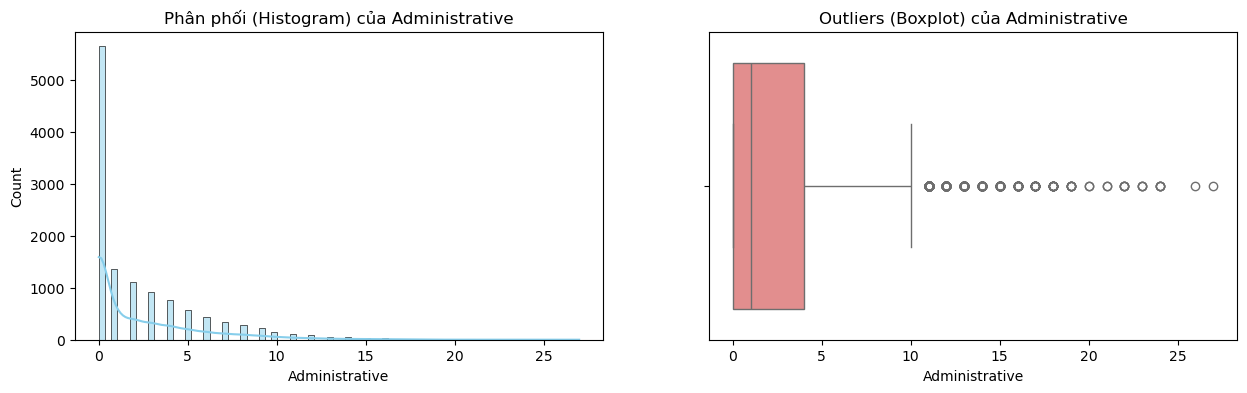

In [103]:
col = 'Administrative'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 1.2 Phân tích về thống kê cột dữ liệu số Administrative
  * **1. Về Phân phối (Distribution)**
    * **Dạng phân phối:** Dữ liệu bị lệch phải nặng (Highly Right-Skewed). Đuôi của biểu đồ kéo dài về phía các giá trị lớn.
    * **Đỉnh (Mode):** Cột cao nhất nằm ở giá trị 0. Cho thấy phần lớn các giá trị quan sát trong dữ liệu có giá trị là 0. Đa số người dùng không truy cập trang Administrative (trang quản trị người dùng).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường kẻ giữa hộp nằm rất lệch về phía bên trái (0, gần 0). Điều này xác nhận lại rằng 50% dữ liệu nằm ở mức thấp.
    * **Trung bình (Mean):** Do biểu đồ bị lệch phải và có nhiều giá trị ngoại lai lớn, vì vậy mà giá trị **trung bình lớn hơn trung vị**.

* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range:** Dữ liệu trải có **min** (giá trị nhỏ nhất) là 0 và **max** (giá trị lớn nhất) là 27. Các giá trị min và max này là hoàn toàn hợp lý với thông số của người dùng truy cập trang Administrative. Phần lớn dữ liệu (75%) từ 0 tới 4. Trong đó, dữ liệu 0 xuất hiện nhiều nhất.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy khoảng tứ phân vị trải từ Q1 (0) đến Q3 (4), độ rộng IQR = 4. Hộp Boxplot hẹp, bắt đầu từ 0 đến gần 5. Điều này cho thấy 50% dữ liệu ở giữa (nhóm trung bình) có biến động rất ít.
    * **Outliers (Giá trị ngoại lai)**:
        * Nhìn vào biểu đồ Boxplot, ta thấy có **rất nhiều outliers** ở phía bên phải.
        * Các điểm này bắt đầu từ khoảng giá trị **>10** và kéo dài đến tận **27** (giá trị max)
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality: Các outliers này là **dữ liệu thực (natural outliers)** chứ không phải lỗi nhập liệu. Vì chúng phân bố liên tục chứ không nhảy vọt lên (như 1000 hoặc số âm). Đây có thể là những nhóm khách hàng đặc biệt, hành động khác hẳn số đông. Vậy kết luận, các **outliers** này là **genuine extreme values**, có thể là nhóm những người có nhu cầu quản trị cao hơn hẳn người bình thường.

* **Chất lượng dữ liệu (Data Quality)**
  * Dựa vào thông số thống kê, biểu đồ histogram và boxplot của cột dữ lột dữ liệu này, ta thấy không có dữ liệu thiếu cũng như không có giá trị impossible (giá trị phi lý).
  * Mặc dù số **0** xuất hiện nhiều nhưng nó mang ý nghĩa thực tế (không truy cập) chứ không phải là placeholder cho dữ liệu rỗng.

#### 2.1 Thống kê cho cột Administrative Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 81.65
   - Median (Trung vị): 9.00
   - Std Dev (Độ lệch chuẩn): 177.49
   - Skewness (Độ lệch): 5.59
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 3398.75
   - Q1(25%): 0.0 | Q3(75%): 94.7 | IQR: 94.7
   - Lower Bound: -142.05 | Upper Bound: 236.75
   - Số lượng Outliers (IQR method): 1149 | Chiếm 9.41%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5778
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




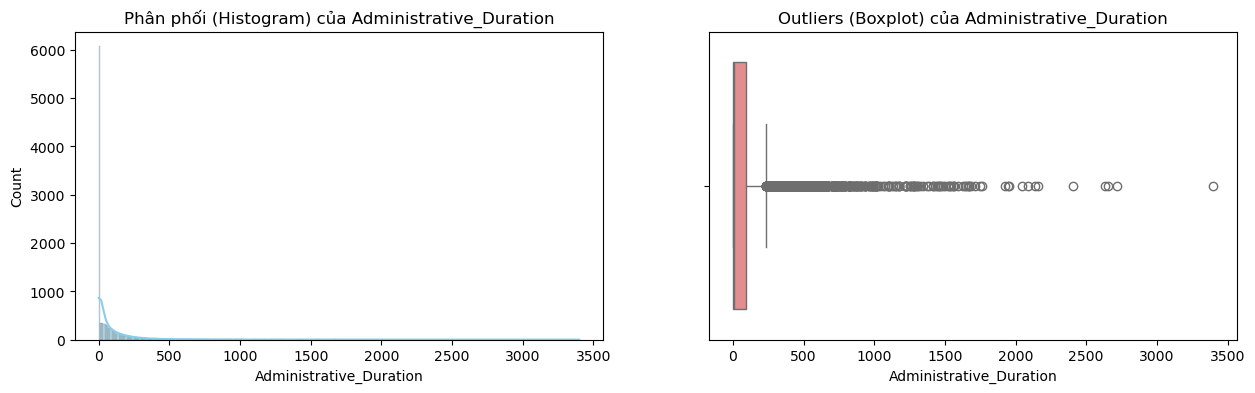

In [104]:
col = 'Administrative_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999])
visualtion(col)

#### 2.2 Phân tích về thống kê cột Administrative Duration
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải rất nặng (Highly Right-Skewedl)**. Đuôi của biểu đồ Histogram kéo dài rất xa về phía bên phải, thể hiện một dải giá trị rộng.
  * **Đỉnh (Mode):** Cột cao nhất nằm ở giá trị 0 (tương ứng với cột Administrative count = 0). Điều này cho thấy phần lớn các phiên truy cập có thời gian lưu lại trang quản trị là 0 giây (người dùng không xem hoặc xem lướt qua cực nhanh), liên hệ với phân tích thống kê ở cột Administrative trước đó. Ta thấy, nguyên nhân chủ yếu là do đa số người dùng không truy cập vào trang này, nên đa số thời gian truy cập đều bằng 0.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường kẻ đại diện cho trung vị nằm rất sát lề trái (gần mức 0). Điều này khẳng định 50% dữ liệu tập trung ở mức thời gian rất thấp.
    * **Trung bình (Mean):** Do biểu đồ bị lệch phải cực đại với các giá trị kéo dài đến hơn 3000, chắc chắn giá trị Trung bình sẽ lớn hơn rất nhiều so với Trung vị. Trung bình bị kéo lên bởi các phiên truy cập kéo dài.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Thời gian truy cập nhỏ nhất là 0 và lớn nhất khoảng 3400 giây. Cho thấy độ biến thiên về thời gian truy cập là rất lớn.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, hộp dữ liệu (thể hiện 50% dữ liệu ở giữa) bị nén rất hẹp ở khoảng giá trị thấp (ước lượng từ 0 đến dưới 100). Điều này cho thấy đa số người dùng có hành vi giống nhau: dành rất ít thời gian cho loại trang này.
    * **Outliers (Giá trị ngoại lai)**
        * Biểu đồ Boxplot hiển thị một lượng **Outliers dày đặc** kéo dài liên tục về phía bên phải.
        * Các điểm ngoại lai bắt đầu xuất hiện ngay sau upper bound (khoảng 250 giây) và kéo dài liên tục đến giá trị cực đại (~3400 giây).
       * **Genuine Extreme Values or Data Entry Errors:** Ở góc độ Data Quality, các outliers này là **dữ liệu thực (genuine extreme values)**. Thời gian 3400 giây (tương đương gần 1 giờ) là hoàn toàn khả thi đối với hành vi người dùng (có thể họ đang đọc kỹ điều khoản, hoặc đơn giản là treo máy/mở tab để đó). Sự phân bố liên tục của các điểm đen chứng tỏ không có sự đứt gãy dữ liệu vô lý.
* **Chất lượng dữ liệu (Data Quality)**
  * Dựa vào thông số thống kê và biểu đồ: Không có giá trị phi lý (thời gian < 0 là vô lý), histogram bắt đầu từ 0.
  * Tính đầy đủ: Không có dấu hiệu của dữ liệu thiếu hay placeholder lạ.
  * Dữ liệu sạch, hợp lý về mặt logic thời gian.
  

#### 3.1 Thống kê cho cột Informational


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.51
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 1.28
   - Skewness (Độ lệch): 4.01
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 24
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2631 | Chiếm 21.56%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9574
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




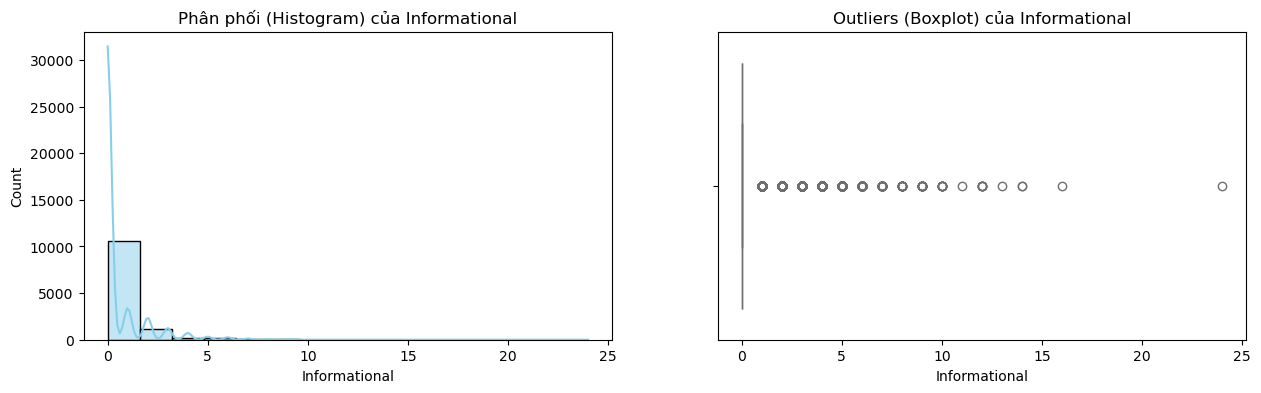

In [105]:
col = 'Informational'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -999, 99, 9999] )
visualtion(col)

#### 3.2 Phân tích về thống kê cột Informational
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kỳ nặng (Extremely Right-Skewed)**. Biểu đồ Histogram gần như chỉ là một cột cao vút tại giá trị 0 và một cái đuôi rất mỏng kéo dài về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm tại giá trị 0. Điều này cho thấy tuyệt đại đa số người dùng không truy cập vào các trang "Informational".
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, phần "hộp" (thể hiện 50% dữ liệu giữa) bị ép dẹp lại thành một đường thẳng nằm ngay tại mức 0. Điều này xác nhận rằng có thể gần hoặc hơn 75% người dùng có số lượt xem trang Informational là 0.
    * **Trung bình (Mean):** Do sự hiện diện của các giá trị dương (từ 1 đến 24) trong khi phần lớn dữ liệu là 0, giá trị Trung bình (Mean) chắc chắn sẽ lớn hơn Trung vị (Median) (Mean > 0)
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến 24. Người dùng không xem trang thông tin nào và xem nhiều nhất là 24 trang. Con số này là hoàn toàn phù hợp, vì người dùng có thể không có nhu cầu xem trang thông tin, con số 24 cũng hoàn toàn phù hợp: vì con số này không quá cao, một người hoàn toàn có khả năng xem 24 trang thông tin.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy Q1 và Q3 gần như trùng nhau tại 0 (hoặc Q3 rất nhỏ). Độ rộng IQR $\approx$ 0. Điều này cho thấy sự biến động của nhóm người dùng trung bình là không có hoặc cực kỳ thấp.
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot hiển thị các điểm ngoại lai (Outliers) bắt đầu xuất hiện ngay từ các giá trị rất nhỏ (khoảng từ 1 hoặc 2 trở đi) và kéo dài đến 24.
       * Trong trường hợp đặc biệt này, vì đa số mọi người không xem trang Informational, nên **bất kỳ ai xem trang này (dù chỉ 1-2 trang) cũng đã trở thành "ngoại lai"** về mặt thống kê so với đám đông.
     * **Genuine Extreme Values or Data Entry Errors:** Các outliers này là **dữ liệu thực (genuine values)**. Việc người dùng xem 1, 2, hay thậm chí 10 trang thông tin là hành vi hoàn toàn bình thường và khả thi trên một website thương mại điện tử, hơn nữa số lượt xem trang lớn nhất là 24, là hoàn toàn phù hợp. Không có dấu hiệu của lỗi nhập liệu.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ, ta thấy:
        * Không có giá trị âm, dữ liệu bắt đầu từ 0.
        * Không thấy các khoảng trống bất thường hay các cột mốc giá trị lạ (placeholder).
        * Dữ liệu sạch, phản ánh đúng thực tế hành vi người dùng (ít quan tâm đến trang thông tin), đạt yêu cầu chất lượng để phân tích.
  

#### 4.1 Thống kê cho cột Information Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 34.83
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 141.42
   - Skewness (Độ lệch): 7.54
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 2549.375
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2405 | Chiếm 19.71%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9800
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 2




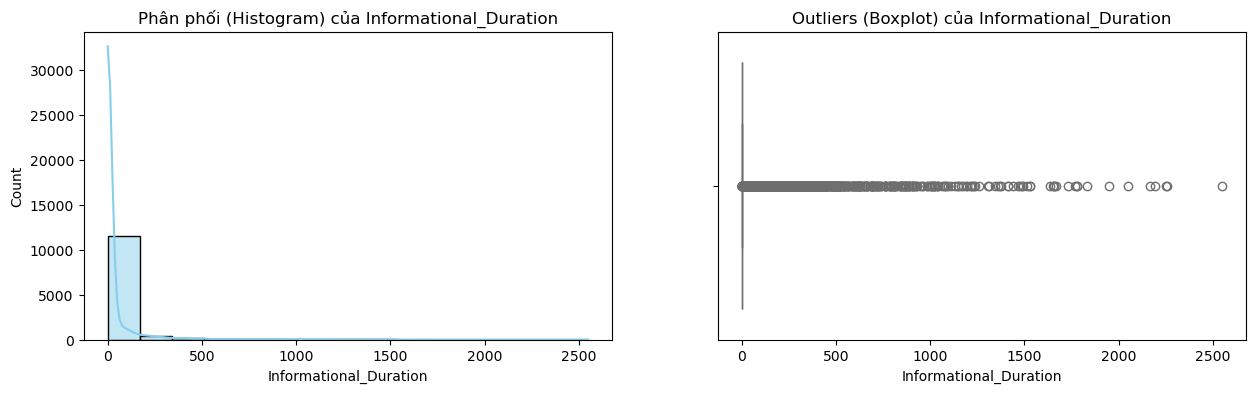

In [106]:
col = 'Informational_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 4.2 Phân tích về thống kê cột Information Duration
* **1. Về Phân phối (Distribution)** 
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram cho thấy một cột cao vút tại giá trị 0 và phần đuôi kéo dài rất mỏng về phía bên phải.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất là 0. Điều này đồng nhất với cột Informational trước đó, cho thấy phần lớn người dùng dành 0 giây cho các trang thông tin (tức là họ không truy cập vào).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Trên biểu đồ Boxplot, đường trung vị bị ép sát vào lề trái tại mức 0. Điều này khẳng định hơn 50% các phiên truy cập có thời gian xem trang thông tin là 0 giây.
    * **Trung bình (Mean):** Do sự xuất hiện của các phiên truy cập kéo dài (đuôi đồ thị kéo đến hơn 2500), giá trị Trung bình (Mean) lớn hơn Trung vị (Median).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến trên 2500 (giây). Khoảng biến thiên rất lớn so với mức trung bình.
    * **IQR (Interquartile Range):** IQR, Q1, và Q3 đều bằng 0. Điều này cho thấy nhóm người dùng có hành vi rất đồng nhất là không dành thời gian cho trang này.
    * **Outliers (Giá trị ngoại lai)**
        * Bởi vì IQR, Q1, và Q3 đều bằng 0, dẫn đến **upper bound và lower bound đều bằng 0**. Vì thế, các giá trị lớn hơn 0 đều là outliers. Biểu đồ Boxplot hiển thị một dải **Outliers dày đặc và liên tục** kéo dài từ ngay trên 0 cho đến hơn 2500.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là **dữ liệu thực (genuine values)**. Việc người dùng dành vài phút đến gần một tiếng (2500 giây ≈ 41 phút) để đọc kỹ các chính sách bảo hành, thông tin vận chuyển hay giới thiệu doanh nghiệp là hành vi hoàn toàn có thể xảy ra, đặc biệt với những khách hàng kỹ tính. Sự phân bố liên tục của các điểm đen cho thấy không có lỗi nhập liệu đột biến.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ, ta thấy:
        * Dữ liệu hợp lệ, không có giá trị âm, dữ liệu bắt đầu từ 0.
        * Dữ liệu đầy đủ, không có dấu hiệu của dữ liệu thiếu hay placeholder bất thường.
        * Dữ liệu sạch và hợp lý về mặt logic. Tuy nhiên, do phần lớn dữ liệu tập trung tại 0, cột này có độ lệch rất cao, cần cân nhắc kỹ thuật xử lý (như phân nhóm người (nhóm có thời gian xem trên 0 và bằng 0))

#### 5.1 Thống kê cho cột Product Related


1. Xu hướng tập trung:
   - Mean (Trung bình): 32.05
   - Median (Trung vị): 18.00
   - Std Dev (Độ lệch chuẩn): 44.59
   - Skewness (Độ lệch): 4.33
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0 | Max: 705
   - Q1(25%): 8.0 | Q3(75%): 38.0 | IQR: 30.0
   - Lower Bound: -37.0 | Upper Bound: 83.0
   - Số lượng Outliers (IQR method): 1007 | Chiếm 8.25%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 38
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




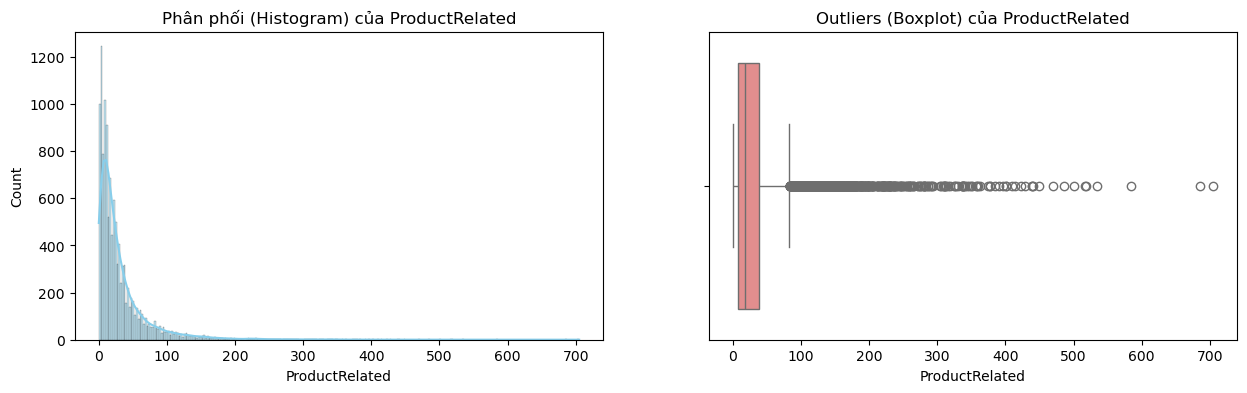

In [107]:
col = 'ProductRelated'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 9999] )
visualtion(col)

#### 5.2 Phân tích về thống kê cột Product Related
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị lệch phải (Right-Skewed). Mặc dù vẫn lệch, nhưng độ dốc của đường cong Histogram "thoải" hơn nhiều so với cột Informational. Phần đuôi kéo dài rất xa về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm ở khoảng giá trị thấp (0 đến 30). Lượng người dùng xem từ 1 trang đến hơn 50 trang sản phẩm là rất lớn. Điều này phản ánh đúng bản chất của trang thương mại điện tử: người dùng vào chủ yếu để lướt xem sản phẩm.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm rõ ràng ở giữa hộp (ước lượng khoảng 15-25), không bị dính vào mức 0. Điều này cho thấy trung bình một người dùng "bình thường" sẽ xem khoảng vài chục sản phẩm.
    * **Trung bình (Mean):** Do ảnh hưởng của phần đuôi dài (kéo đến 700) và lượng outliers khổng lồ, giá trị Trung bình (Mean = 31.71) lớn hơn đáng kể so với Trung vị (Median = 18.00).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến trên 700. Khoảng biến thiên lớn.
    * **IQR (Interquartile Range):** Dựa vào Boxplot, ta thấy boxplot có độ rộng rõ ràng. IQR bằng 31 cho thấy hành vi của nhóm khách hàng phổ thông có sự đa dạng nhất định (có người xem ít, có người xem vừa phải).
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot cho thấy một lượng **Outliers khổng lồ và dày đặc**. Các outliers xuất hiện và xuất hiện dày đặc từ khoảng giá trị 100 và kéo dài liên tục đến hơn 700.
       * **Genuine Extreme Values or Data Entry Errors:**
           * Các outlier có gía trị từ 100-400 chắc chắn trên 99% là **dữ liệu thực (genuine values)**. Vì việc một khách hàng xem 100-200 sản phẩm khi đi "dạo" (window shopping) là bình thường.Hơn nữa, các outliers này tập trung dày đăch, dữ liệu phân bố liên tục trong đoạn này, nên không có khả năng là lỗi nhập dữ liệu. có khả năng một vài outlier (từ mốc trên 500 trở lên) là **dữ liệu nhập sai**.
           * Các outliers có giá trị trên 500 - 700 vẫn nằm trong giới hạn khả thi (con người có thể click 700 lần trong một phiên dài). Mặc dù có khả năng nhỏ đây là hành vi của Bot/Crawler (máy quét), nhưng do dữ liệu không bị đứt gãy đột ngột (ví dụ nhảy vọt từ 400 lên 5000), ta có thể tạm kết luận đây là **dữ liệu thực (genuine values)**
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê biểu đồ:
        *  **Tính hợp lệ & Đầy đủ**: Dữ liệu sạch, không có giá trị âm hay giá trị phi lý (impossible), cũng như không có giá trị thay thế (placeholder).
        *  Dữ liệu có độ biến thiên cao (High Variance), Median khác 0. Đây là cột dữ liệu có chất lượng phân tích tốt nhất, chứa đựng nhiều thông tin (information gain) để phân loại hành vi người dùng trong mô hình dự đoán.

#### 6.1 Thống kê cho cột Product Related Duration


1. Xu hướng tập trung:
   - Mean (Trung bình): 1206.98
   - Median (Trung vị): 608.94
   - Std Dev (Độ lệch chuẩn): 1919.60
   - Skewness (Độ lệch): 7.25
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 63973.52223
   - Q1(25%): 193.0 | Q3(75%): 1477.154762 | IQR: 1284.154762
   - Lower Bound: -1733.2321429999997 | Upper Bound: 3403.3869049999994
   - Số lượng Outliers (IQR method): 951 | Chiếm 7.79%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 630
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 10




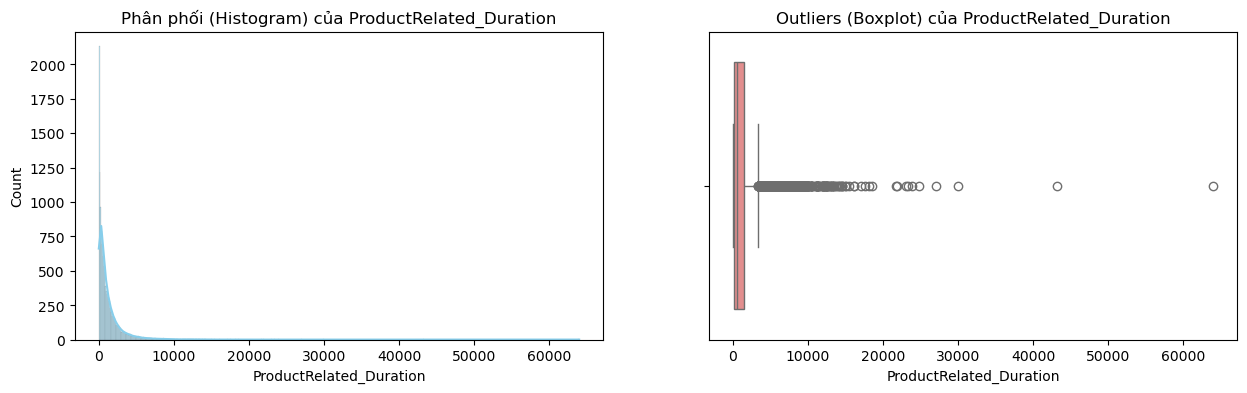

In [108]:
col = 'ProductRelated_Duration'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 6.2 Phân tích về thống kê cột Product Related Duration
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải nặng (Highly Right-Skewed)**. Đuôi của biểu đồ Histogram kéo dài rất xa về phía bên phải (trục X lên tới hơn 60.000).
  * **Đỉnh (Mode):** Cột cao nhất nằm ở khoảng giá trị đầu tiên. Nhìn vào biểu đồ ta thấy đường cong phân phối ở đây có độ thoải nhất định, cho thấy người dùng thực sự dành một khoảng thời gian đáng kể để xem sản phẩm, chứ không chỉ thoát ngay lập tức.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm lệch về phía bên trái của hộp nhưng tách biệt rõ ràng khỏi mức 0. Điều này cho thấy "người dùng trung bình" dành một lượng thời gian cụ thể (ước lượng vài phút đến vài chục phút) để xem hàng.
    * **Trung bình (Mean):** Do ảnh hưởng cực lớn của các giá trị ngoại lai lên tới 60.000 giây (khoảng 16 tiếng), giá trị Trung bình (Mean = 1194.75) vì thế lớn hơn rất nhiều so với Trung vị (Median = 598.94). 
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải rất rộng, từ 0 đến trên 60.000 (giây). Đây là cột có khoảng biến thiên lớn nhất trong tất cả các cột thời gian. Giá trị min bằng 0 hoàn toàn hợp lý, vì người dùng có thể vào website nhưng không bấm mua trang nào cả. Giá trị lớn nhất 60.000 giây (gần 16 tiếng), có thể không phù hợp về thời gian tương tác thực (active time), nhưng nó vẫn đúng về hành vi và mặt kỹ thuật. Ví dụ như khi người dùng "treo máy", thì con số này vẫn bình thường và hợp lý.
    * **IQR (Interquartile Range):** Độ rộng của Boxplot rõ ràng, thể hiện sự đa dạng trong hành vi của nhóm khách hàng phổ thông (người xem lướt với người xem kỹ). 
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot cho thấy một dải Outliers **dày đặc**, ước lượng dày đặc và kéo dài liên tục, đều đặn từ khoảng 3500 ngìn giây đến gần 20000 giây. Sau 20000 giây, các outlier phân bố rời rạc, outlier cao nhất có giá trị 60000 giây.
       * **Genuine Extreme Values or Data Entry Errors:**
           * **Các outliers có giá trị bé hơn 50000 giây (gần 1.5 tiếng):** Hoàn toàn bình thường cho một phiên mua sắm tích cực.
           * **Giá trị cực đoan (20.000 - 60.000 giây ~ 5 đến 16 tiếng):** Vì máy ghi tự động, nên đây không phải lỗi nhập liệu. Khả năng cao đây là hành vi của người dùng "treo máy" (có thể là mở tab sản phẩm rồi để đó đi làm việc khác, hoặc quên tắt máy) hoặc bot (máy quét). Nó có thể thật về mặt kĩ thuật, nhưng cũng có nguy cơ không phản ánh đúng "thời gian tương tác thực tế".
           * Nhìn chung, đây vẫn là **dữ liệu thực (genuine values)** nhưng cần phân loại kỹ về mặt hành vi.
* **Chất lượng dữ liệu (Data Quality)**
    * Dựa vào thông số thống kê và biểu đồ:
        * Dữ liệu sạch, không có giá trị âm, không có giá trị phi lý, cũng như không có giá trị placeholders.
        * Cột dữ liệu này có độ biến thiên rất cao, chứa đựng nhiều thông tin quan trọng.

#### 7.1 Thống kê cho cột Bounce Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.02
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 3.16
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.0 | Q3(75%): 0.016666667 | IQR: 0.016666667
   - Lower Bound: -0.0250000005 | Upper Bound: 0.041666667500000004
   - Số lượng Outliers (IQR method): 1428 | Chiếm 11.70%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 5518
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




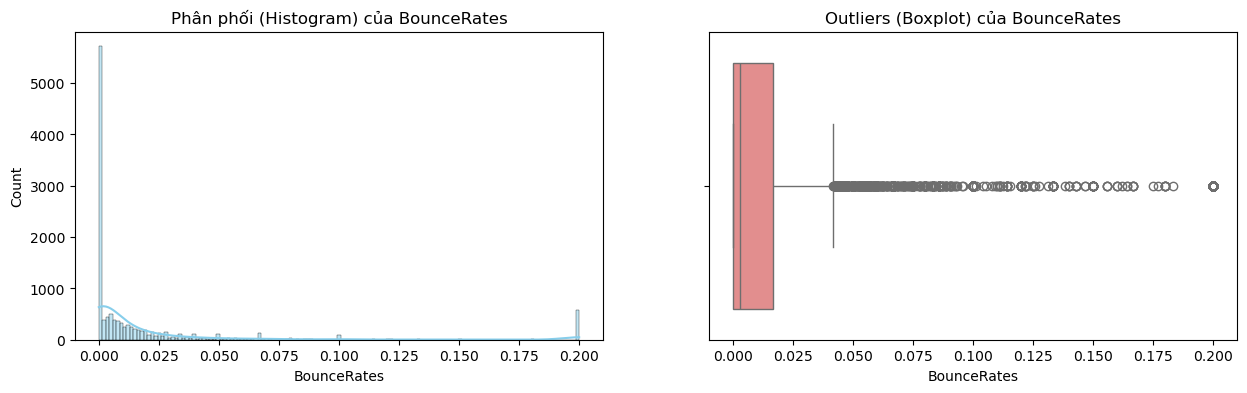

In [109]:
col = 'BounceRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 7.2 Phân tích về thống kê cột Bounce Rate
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram cho thấy một cột cao vút tại giá trị 0.00 và phần đuôi kéo dài về phía bên phải.
  * **Đỉnh (Mode):** Cột cao nhất nằm tại giá trị 0.00. Điều này cho thấy phần lớn các phiên truy cập có tỷ lệ Bounce Rate trung bình là 0% (tức là người dùng tương tác tốt, không thoát ngay lập tức từ trang đích). Có một đỉnh phụ nhỏ xuất hiện ở mức cực đại 0.20.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, ta thấy đường trung vị nằm rất sát mức 0.00. Điều này khẳng định hơn 50% các phiên truy cập có chỉ số Bounce Rate cực thấp hoặc bằng 0.
    * **Trung bình (Mean):** Do sự xuất hiện của dải dữ liệu kéo dài về phía 0.20 (đặc biệt là nhóm outliers), giá trị Trung bình (Mean = 0.02) lớn hơn Trung vị (Median = 0.00).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Tỉ lệ bound rate thấp nhất là 0.00 và cao nhất là 0.20. Dữ liệu trải dài từ 0.00 đến 0.20, do giá trị này thường được tính toán theo công thức riêng của Google Analytics cho "Average Bounce Rate" của các trang đã xem, nên giá trị max ở đây dừng ở 0.2 là đặc thù của dữ liệu này.
    * **IQR (Interquartile Range):** Boxplot có độ rộng rất hẹp, nằm gói gọn trong khoảng từ 0.00 đến khoảng 0.02. Điều này cho thấy nhóm người dùng phổ thông có chỉ số Bounce Rate rất thấp và đồng nhất.
    * **Outliers (Giá trị ngoại lai)**
       * Biểu đồ Boxplot hiển thị một lượng **Outliers dày đặc và liên tục** bắt đầu từ khoảng 0.05 kéo dài đến 0.20.
       * **Genuine Extreme Values or Data Entry Errors:**
         * Đây là **dữ liệu thực (genuine values)**. Các chỉ số Bounce Rate cao (gần 0.2) đại diện cho nhóm người dùng vào website và thoát ra ngay (không tương tác), hoặc truy cập vào các trang cụ thể có tỷ lệ thoát cao.
         * Sự xuất hiện của một nhóm các outliers tập trung tại mốc 0.20 cho thấy có một nhóm phiên truy cập đạt mức trần của chỉ số này. Đây là hành vi thực tế, không phải do dữ liệu đầu vào sai.
* **Chất lượng dữ liệu (Data Quality)**
    * **Tính hợp lệ:** Dữ liệu nằm trong khoảng dương [0, 0.2], không có giá trị âm.
    * **Tính đầy đủ:** Không có dấu hiệu đứt gãy hay giá trị placeholder lạ.
    * Nhìn chung, dữ liệu sạch. Tuy nhiên, phân phối lệch nhiều về bên phải, và có nhiều điểm dữ liệu có giá trị 0.
        

#### 8.1 Thống kê cho cột Exit Rate


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.04
   - Median (Trung vị): 0.03
   - Std Dev (Độ lệch chuẩn): 0.05
   - Skewness (Độ lệch): 2.23
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 0.2
   - Q1(25%): 0.014230973 | Q3(75%): 0.048529412 | IQR: 0.034298439
   - Lower Bound: -0.0372166855 | Upper Bound: 0.0999770705
   - Số lượng Outliers (IQR method): 1325 | Chiếm 10.86%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 76
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




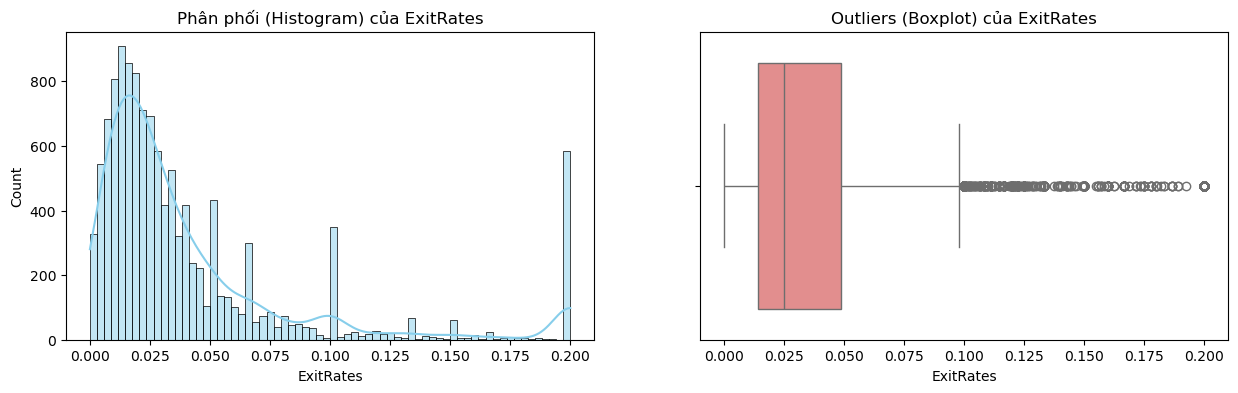

In [110]:
col = 'ExitRates'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 8.2 Phân tích về thống kê cột Exit Rate
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải (Right-Skewed)** nhưng có hình thái đặc biệt. Biểu đồ Histogram cho thấy đỉnh chính nằm ở khoảng giá trị thấp (0.01 - 0.03), nhưng lại có một **đỉnh phụ** đột biến ở giá trị cực đại 0.20.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất nằm trong khoảng 0.02 - 0.03 (2-3%). Điều này cho thấy đa số các trang có tỷ lệ thoát thấp, giữ chân người dùng tốt. Tuy nhiên, lượng trang có tỷ lệ thoát 20% cũng chiếm tỷ trọng đáng kể.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Nhìn vào Boxplot, đường trung vị nằm khoảng 0.025, lệch về phía trái của hộp.
    * **Trung bình (Mean):** Do ảnh hưởng của nhóm dữ liệu lớn tại mức 0.20 (outliers và đỉnh phụ), giá trị Trung bình (Mean = 0.04) lớn hơn Trung vị (Median = 0.03).
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0.00 đến 0.20. Exit rate min bằng 0.0 và Exit rate max bằng 0.2. Các giá trị min và max này là hoàn toàn hợp lệ, vì Exit Rate là tỷ lệ phần trăm (luôn >= 0). 
    * **IQR (Interquartile Range):** Dựa vào độ rộng của boxplot, và thông số IQR = 0,0357, cho thấy rằng 50% các trang web trung bình có tỷ lệ thoát dao động trong mức chấp nhận được. 
    * **Outliers (Giá trị ngoại lai)**
        * Biểu đồ Boxplot cho thấy các điểm ngoại lai bắt đầu xuất hiện sau mốc 0.10 (10%) và tập trung dày đặc thành một vệt đen tại mức 0.20. 
       * **Genuine Extreme Values or Data Entry Errors:** Đây là **dữ liệu thực**. Các trang có Exit Rate cao (đặc biệt là mức 0.20) thường là các trang đích cuối cùng (như trang "Cảm ơn đã mua hàng") hoặc các trang bị lỗi/nội dung kém khiến người dùng thoát ngay.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu không có giá trị thiếu/ giá trị âm cũng như không có giá trị phi lý và không có giá trị placeholders.  
    * Dữ liệu sạch. Phân phối có tính chất "hai đỉnh" nhẹ (bimodal behavior) ở đầu và cuối, đây là tín hiệu tốt để phân nhóm các trang "Performance tốt" và "Performance kém".

#### 9.1 Thống kê cho cột Page Values


1. Xu hướng tập trung:
   - Mean (Trung bình): 5.95
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 18.65
   - Skewness (Độ lệch): 6.35
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 361.7637419
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 2730 | Chiếm 22.37%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 9475
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




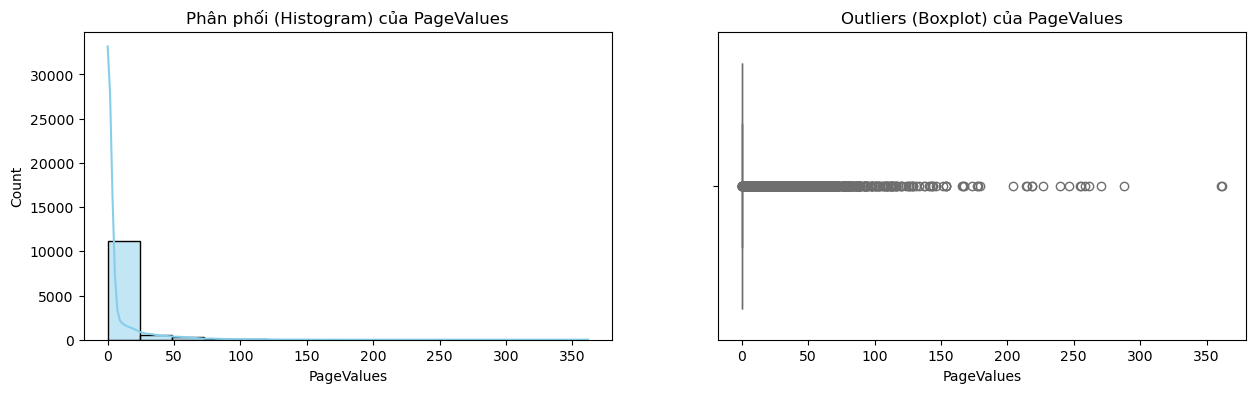

In [111]:
col = 'PageValues'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 9.2 Phân tích về thống kê cột Page Values
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải cực kì nặng (Extremely Right-Skewed)**. Biểu đồ Histogram là một ví dụ điển hình của phân phối Zero-inflated (lạm phát số 0), với cột tại giá trị 0 cao vút và đuôi kéo dài rất mỏng.
  * **Đỉnh (Mode):** Giá trị xuất hiện nhiều nhất tuyệt đối là 0. Điều này phản ánh thực tế: Hầu hết các trang web trong một phiên truy cập không đóng góp trực tiếp vào việc hoàn tất đơn hàng (hoặc người dùng không mua hàng, nên giá trị trang = 0).
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Trên Boxplot, đường trung vị trùng khít với mức 0. Điều này khẳng định phần lớn các trang có PageValue bằng 0.
    * **Trung bình (Mean):** Do tác động của các giá trị ngoại lai rất lớn (lên tới 350), giá trị trung bình (Mean = 5.89) lớn hơn trung vị (Median = 0.00) 
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu trải dài từ 0 đến khoảng 360. Khoảng biến thiên rất lớn.
    * **IQR (Interquartile Range):** Do Q1 và Q3 và IQR đều bằng 0, IQR. Nhóm dữ liệu trung tâm gần như không có biến động.
    * **Outliers (Giá trị ngoại lai)**
        * Vì Q1, Q3 và IQR đều bằng 0, nên upper bound và lower bound đều bằng 0. Dẫn đến các giá trị lớn hơn 0 đều được xem là outliers. Vì thế, biểu đồ Boxplot hiển thị một dải **Outliers dày đặc và kéo dài** từ sát mức 0 đến hơn 350.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là dữ liệu thực và cực kỳ quan trọng. Những giá trị ngoại lai này đại diện cho các trang web "vàng" (như trang thanh toán, trang sản phẩm hot) đã đóng góp trực tiếp vào doanh thu. Trong bài toán dự đoán hành vi mua hàng, các "outliers" này chính là đặc trưng quan trọng nhất.
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, không có giá trị âm, không có giá trị phi lý cũng như không có placeholders.
    *  Dữ liệu chất lượng cao cho mục đích phân loại. Mặc dù bị lệch nặng, nhưng sự khác biệt giữa giá trị 0 và lớn hơn 0 là yếu tố then chốt để dự đoán doanh thu.

#### 10.1 Thống kê cho cột Special Day


1. Xu hướng tập trung:
   - Mean (Trung bình): 0.06
   - Median (Trung vị): 0.00
   - Std Dev (Độ lệch chuẩn): 0.20
   - Skewness (Độ lệch): 3.29
	-> Phân phối dữ liệu: Lệch phải (Right Skewed)

2. Phạm vi & Outliers:
   - Min: 0.0 | Max: 1.0
   - Q1(25%): 0.0 | Q3(75%): 0.0 | IQR: 0.0
   - Lower Bound: 0.0 | Upper Bound: 0.0
   - Số lượng Outliers (IQR method): 1249 | Chiếm 10.23%

3. Chất lượng dữ liệu:
   - Missing Count: 0 | Missing Percentage: 0.00%
   - Giá trị bằng 0: 10956
   - Negative Values: 0
   - Impossible Values: 0
   - Placeholders Values: 0




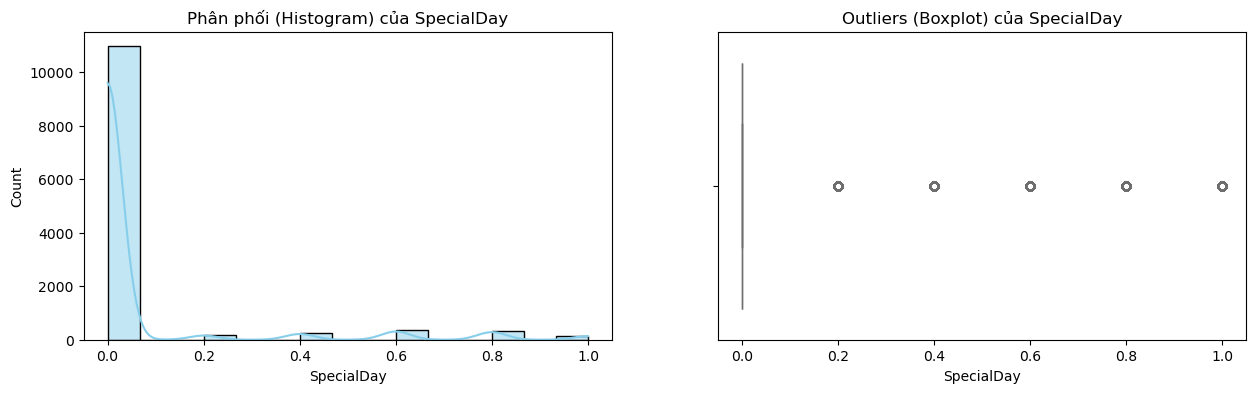

In [112]:
col = 'SpecialDay'
# Distribution & Central tendency
distri_num_col_info(col) 
# Range & Outliers
range_outliers_num_col_info(col)
float('inf')
# Data quality
data_quality_num_col_info(col, valid_range = (0,np.inf), suspicious_values = [-1, -9, -99, 99, 999, 9999] )
visualtion(col)

#### 10.2 Phân tích về thống kê cột Special Day
* **1. Về Phân phối (Distribution)**
  * **Dạng phân phối:** Dữ liệu bị **lệch phải (Right-Skewed)** và có tính chất Rời rạc (Discrete). Biểu đồ Histogram cho thấy cột cao nhất tại 0, và các cột nhỏ thấp dần tại các mốc cụ thể (0.2, 0.4, 0.6, 0.8, 1.0).
  * **Đỉnh (Mode):** Giá trị phổ biến nhất là 0. Phần lớn các phiên truy cập diễn ra vào ngày thường, không gần các ngày lễ đặc biệt.
* **2. Về Xu Hướng Trung Tâm (Central Tendency)**
    * **Trung vị (Median):** Đường trung vị trên Boxplot nằm tại 0, giá trị trung vị bằng 0.
    * **Trung bình (Mean):** Giá trị Mean nhỏ, bằng 0.06 nhưng lớn hơn Median do ảnh hưởng của các giá trị > 0.
* **3. Về Độ Phân Tán & Outliers (Range & Outliers)**
    * **Range**: Dữ liệu nằm trong khoảng [0, 1]. Giá trị này biểu thị độ "gần" đến ngày lễ (0 là xa, 1 là chính ngày lễ).
    * **IQR (Interquartile Range):** IQR = 0 (vì cả Q1, Median, Q3 đều bằng 0).
    * **Outliers (Giá trị ngoại lai)**
        * Vì Q1, Q3 và IQR đều bằng 0, nên upper bound và lower bound đều bằng 0. Dẫn đến các giá trị lớn hơn 0 đều được xem là outliers. Hơn nữa, dữ liệu có phân bố rời rạc, nên các outliers tập trung rời rạc tại 0.2, 0.4, 0.6, 0.8, 1.0.
       * **Genuine Extreme Values or Data Entry Errors:** Đây là dữ liệu thực. Chúng đại diện cho các ngày nằm trong "cửa sổ" mua sắm dịp lễ. Việc chúng ít xuất hiện là hiển nhiên vì ngày lễ chỉ diễn ra vài lần trong năm.
       * 
* **Chất lượng dữ liệu (Data Quality)**
    * Dữ liệu sạch, nằm chuẩn trong biên độ [0, 1], không có giá trị âm, không có giá trị phi lý cũng như không có placeholders.
    *  Dữ liệu tốt, phản ánh đúng yếu tố mùa vụ. Do tính chất rời rạc và tập trung tại 0, biến này nên được coi là biến phân loại.

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        IV. Về các cột Categorical
    </h3>
</div>

In [25]:
numerical_list = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
target_col = 'Revenue'

In [26]:
# Xác định các cột categorical
categorical_cols = [col for col in data.columns if col not in numerical_list]
print("="*50)
print("CÁC CỘT CATEGORICAL:")
print("="*50)
print(f"Tổng số cột categorical: {len(categorical_cols)}")
print(f"Tên các cột: {categorical_cols}\n")

CÁC CỘT CATEGORICAL:
Tổng số cột categorical: 8
Tên các cột: ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']



In [27]:
print("="*50)
print("PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    
    # Số lượng giá trị khác nhau (unique values)
    n_unique = data[col].nunique()
    print(f"    + Số lượng giá trị khác nhau (Unique): {n_unique}")
    
    # Phân phối tần suất
    value_counts = data[col].value_counts(dropna=False)
    print(f"    + Top 10 giá trị xuất hiện nhiều nhất:")
    print(value_counts.head(10))
    
    # Kiểm tra cân bằng phân phối
    if n_unique > 1:
        most_freq = value_counts.iloc[0]
        least_freq = value_counts.iloc[-1]
        ratio = most_freq / least_freq if least_freq > 0 else float('inf')
        print(f"    + Tần suất cao nhất: {most_freq} | Tần suất thấp nhất: {least_freq}")
        print(f"    + Tỷ lệ cân bằng: {ratio:.2f}:1")
        if ratio > 10:
            print(f"-> Phân phối rất lệch (Highly Imbalanced)\n")
        elif ratio > 3:
            print(f"-> Phân phối lệch (Imbalanced)\n")
        else:
            print(f"-> Phân phối cân bằng (Balanced)\n")

PHÂN PHỐI GIÁ TRỊ CÁC CỘT CATEGORICAL
- Cột: Month
    + Số lượng giá trị khác nhau (Unique): 10
    + Top 10 giá trị xuất hiện nhiều nhất:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64
    + Tần suất cao nhất: 3329 | Tần suất thấp nhất: 0
    + Tỷ lệ cân bằng: inf:1
-> Phân phối rất lệch (Highly Imbalanced)

- Cột: OperatingSystems
    + Số lượng giá trị khác nhau (Unique): 8
    + Top 10 giá trị xuất hiện nhiều nhất:
OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64
    + Tần suất cao nhất: 6541 | Tần suất thấp nhất: 6
    + Tỷ lệ cân bằng: 1090.17:1
-> Phân phối rất lệch (Highly Imbalanced)

- Cột: Browser
    + Số lượng giá trị khác nhau (Unique): 13
    + Top 10 giá trị xuất hiện nhiều nhất:
Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      5

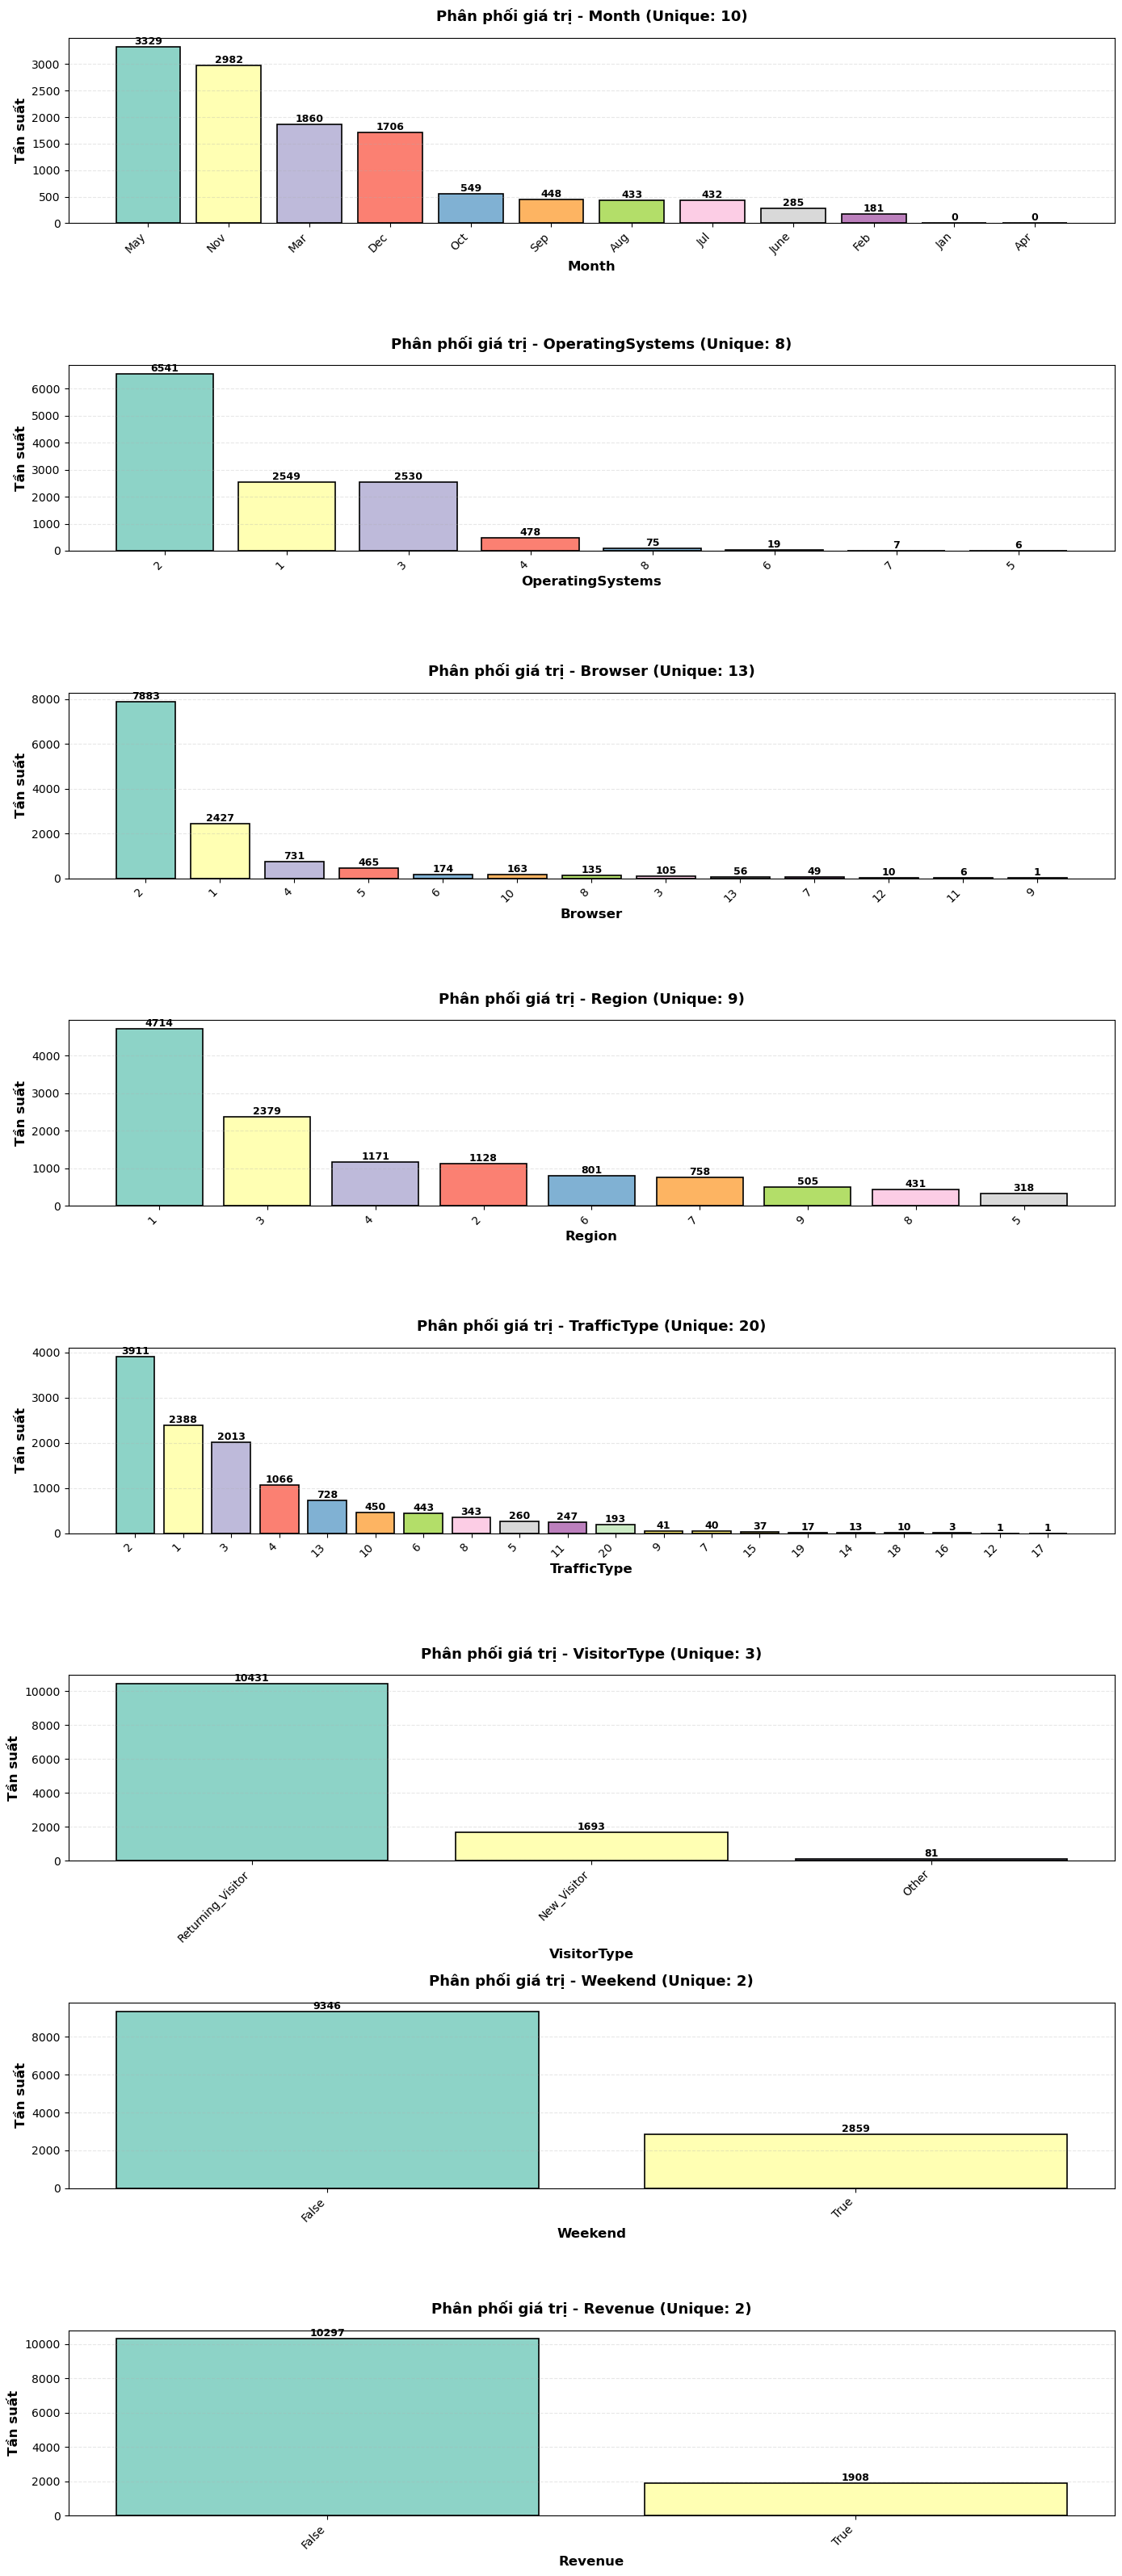

In [28]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(14, 4*len(categorical_cols)))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Tạo count plot
    value_counts = data[col].value_counts(dropna=False)
    colors = plt.cm.Set3(range(len(value_counts)))
    
    bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black', linewidth=1.2)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=10)
    ax.set_xlabel(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tần suất', fontsize=12, fontweight='bold')
    ax.set_title(f'Phân phối giá trị - {col} (Unique: {data[col].nunique()})', fontsize=13, fontweight='bold', pad=15)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Thêm giá trị lên từng cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### 1. Tổng quan về tập dữ liệu
* **Đặc điểm chính:** Hầu hết các đặc trưng (features) đều có sự phân phối **lệch (skewed)**, dữ liệu không đồng đều giữa các nhóm.

---

#### 2. Phân tích chi tiết từng đặc trưng
##### Thời gian (Month & Weekend)
* **Month (Tháng):**
    * **Cao điểm:** Tháng 5 (`May`) và tháng 11 (`Nov`). Có thể liên quan đến các đợt khuyến mãi hoặc sự kiện theo mùa.
    * **Thấp điểm:** Tháng 2 (`Feb`).
    * **Lưu ý:** Dữ liệu chỉ có 10 tháng (Unique: 10), thiếu tháng 1 và tháng 4.
* **Weekend (Cuối tuần):**
    * Lượng truy cập vào **Ngày thường (False)** cao gấp **3 lần** so với **Cuối tuần (True)**.
    * -> **Insight:** Website có thể phục vụ cho công việc (B2B), tin tức tài chính hoặc công cụ học tập.

##### Công nghệ 
* **OS:** `Label 2` chiếm ưu thế vượt trội (> 6000), theo sau là `1`.
* **Browser:** `Label 2` chiếm thị phần áp đảo (gần 8000).
* -> **Insight:** Người dùng có xu hướng sử dụng công nghệ tập trung, ít đa dạng. Cần tối ưu giao diện (UI/UX) cho các nền tảng phổ biến này trước.

##### Hành vi người dùng
* **VisitorType:**
    * **Returning_Visitor (Khách quay lại):** 10,431 (Chiếm đa số).
    * **New_Visitor (Khách mới):** 1,693.
    * -> **Insight:** Tỷ lệ giữ chân khách hàng (Retention) rất tốt. Tuy nhiên, việc thu hút khách hàng mới (Acquisition) đang thấp.
* **TrafficType:**
    * Phân phối dạng đuôi dài (Long tail). `Type 2` cao nhất, các loại nguồn khác giảm dần.

* **Region:**
    * `Region 1` đóng góp lượng truy cập lớn nhất (gần 5000).

---

#### 3. Khuyến nghị cho Data Science

| Vấn đề | Gợi ý xử lý |
| :--- | :--- |
| **Mất cân bằng dữ liệu** | Dữ liệu `VisitorType` và `Browser` bị lệch nghiêm trọng. Cần sử dụng kỹ thuật **Resampling** (SMOTE, Undersampling) hoặc dùng **Class Weights** khi train model. |
| **Nhiều giá trị đơn lẻ** | Với `TrafficType` hoặc `Browser` (các giá trị đuôi dài), nên gom nhóm các giá trị ít xuất hiện thành nhóm `Other` để giảm nhiễu. |
| **Feature Engineering** | Kiểm tra tương quan (Correlation) giữa `OS` và `Browser` để tránh đa cộng tuyến (Multicollinearity). |

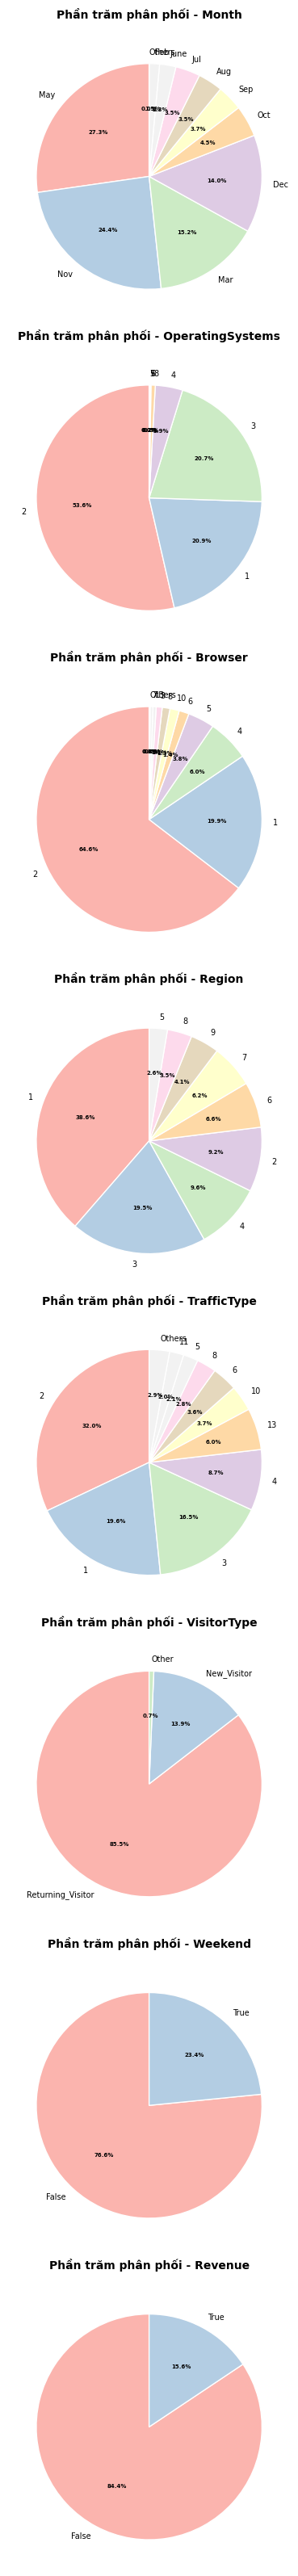

In [29]:
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 4*len(categorical_cols)))

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Lấy top 10 categories (nếu nhiều hơn sẽ ghép "Others")
    value_counts = data[col].value_counts(dropna=False)
    if len(value_counts) > 10:
        top_10 = value_counts.head(10)
        others = value_counts.iloc[10:].sum()
        top_10['Others'] = others
        value_counts = top_10
    
    colors = plt.cm.Pastel1(range(len(value_counts)))
    wedges, texts, autotexts = ax.pie(value_counts.values, 
                                        labels=value_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90,
                                        textprops={'fontsize': 7},
                                        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(5)
    
    ax.set_title(f'Phần trăm phân phối - {col}', fontsize=10, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

Biểu đồ tròn làm nổi bật **cơ cấu phần trăm** và sự chênh lệch giữa các nhóm.

---

#### 1. Phân tích Chi tiết Tỷ trọng

##### Yếu tố Thời gian
* **Month (Tháng):**
    * **Sự tập trung cao độ:** Top 4 tháng dẫn đầu (`May`, `Nov`, `Mar`, `Dec`) chiếm khoảng **81%** tổng dữ liệu.
    * **Tháng 5 (May):** Chiếm thị phần lớn nhất (**27.3%**).
    * **Các tháng còn lại:** Chiếm tỷ trọng rất nhỏ (1-3%), cho thấy tính thời vụ mạnh mẽ.
* **Weekend (Cuối tuần):**
    * **Ngày thường (76.7%)** áp đảo so với **Cuối tuần (23.3%)**.
    * -> **Kết luận:** Website chủ yếu được truy cập vào giờ hành chính/ngày làm việc.

##### Hành vi Khách hàng (User Behavior)
* **VisitorType (Loại khách):**
    * **Returning Visitor:** Chiếm **85.6%** (Rất cao).
    * **New Visitor:** Chỉ chiếm **13.7%**.
    * -> **Insight:** Website có khả năng giữ chân khách hàng (Retention) tốt, nhưng khả năng thu hút khách mới (Acquisition) đang yếu.

##### Hạ tầng và Công nghệ
* **OperatingSystems (OS):**
    * `OS 2` chiếm quá bán (**53.5%**).
    * Top 3 OS (`2`, `1`, `3`) cộng lại chiếm tới **95%**.
* **Browser:**
    * `Browser 2` chiếm thế độc tôn (**64.6%**).
    * Các trình duyệt còn lại bị phân mảnh mạnh (đuôi dài).

##### Khu vực và Nguồn truy cập
* **Region:** Phân phối đều hơn các đặc trưng khác, nhưng `Region 1` vẫn lớn nhất (**38.8%**).
* **TrafficType:** `Type 2` dẫn đầu (**31.7%**).

---

#### 2. Đánh giá Trực quan hóa 

Mặc dù biểu đồ tròn giúp xem cơ cấu, nhưng các biểu đồ hiện tại đang gặp một số vấn đề về thẩm mỹ và tính dễ đọc:

| Vấn đề | Giải thích | Giải pháp gợi ý |
| :--- | :--- | :--- |
| **Bị Rối** | Các biểu đồ `Browser`, `TrafficType`, `Month` có quá nhiều lát cắt nhỏ (< 1%) khiến nhãn bị đè lên nhau, khó đọc. | Gom các giá trị nhỏ (ví dụ < 5%) thành nhóm chung là **"Others"**. |
| **Thứ tự** | Biểu đồ `Month` đang sắp xếp theo độ lớn (May -> Nov...) thay vì thời gian. | Nên sắp xếp lại theo thứ tự lịch: **Jan -> Feb -> Mar...** để thấy xu hướng. |

In [30]:
print("="*50)
print("BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL")
print("="*50)

summary_data = []
for col in categorical_cols:
    n_unique = data[col].nunique()
    missing_count = data[col].isna().sum()
    missing_ratio = (missing_count / len(data)) * 100
    value_counts = data[col].value_counts(dropna=False)
    most_freq_value = value_counts.index[0]
    most_freq_count = value_counts.iloc[0]
    most_freq_ratio = (most_freq_count / len(data)) * 100
    
    summary_data.append({
        'Cột': col,
        'Số Unique': n_unique,
        'Missing (%)': f'{missing_ratio:.2f}%',
        'Giá trị phổ biến nhất': most_freq_value,
        'Tần suất (%)': f'{most_freq_ratio:.2f}%'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

BẢNG TÓM TẮT CHẤT LƯỢNG DỮ LIỆU CATEGORICAL
             Cột  Số Unique Missing (%) Giá trị phổ biến nhất Tần suất (%)
           Month         10       0.00%                   May       27.28%
OperatingSystems          8       0.00%                     2       53.59%
         Browser         13       0.00%                     2       64.59%
          Region          9       0.00%                     1       38.62%
     TrafficType         20       0.00%                     2       32.04%
     VisitorType          3       0.00%     Returning_Visitor       85.46%
         Weekend          2       0.00%                 False       76.58%
         Revenue          2       0.00%                 False       84.37%


___
#### Đánh giá Bảng Tóm tắt Chất lượng Dữ liệu

##### 1. Tính Toàn vẹn của Dữ liệu:
* **Không có giá trị khuyết (Missing Values):** Tất cả các cột đều có tỉ lệ Missing là **0.00%**.
* **Kết luận:** Dữ liệu rất sạch về mặt kỹ thuật, bạn không cần thực hiện các bước xử lý điền khuyết.

##### 2. Phân tích Độ đa dạng
* **Biến có độ đa dạng cao:** `TrafficType` (20 giá trị) và `Browser` (13 giá trị).
    * *Lưu ý:* Khi mã hóa (encoding) các biến này, cần thận trọng nếu dùng One-Hot Encoding vì sẽ tạo ra quá nhiều cột mới.
* **Biến có độ đa dạng thấp:** `VisitorType` (3), `Weekend` (2). Các biến này thích hợp làm biến phân loại chính hoặc đích dự đoán.
* **Vấn đề về thời gian:** Cột `Month` chỉ có **10** giá trị unique. Một năm có 12 tháng -> **Dữ liệu bị thiếu 2 tháng**.

##### 3. Mất cân bằng dữ liệu
Hầu hết các biến đều bị lệch (skewed), tức là một giá trị chiếm ưu thế áp đảo:

| Cột | Giá trị phổ biến nhất | Tỷ lệ chiếm (%) | Nhận xét |
| :--- | :---: | :---: | :--- |
| **VisitorType** | Returning_Visitor | **85.57%** | **Rất lệch.** Mô hình sẽ có xu hướng học thiên vị theo nhóm khách quay lại. Cần kỹ thuật xử lý (Resampling/Class Weight). |
| **Weekend** | False | **76.74%** | Phản ánh đúng thực tế (5 ngày thường vs 2 ngày cuối tuần). |
| **Browser** | 2 | **64.57%** | Người dùng tập trung vào một trình duyệt cụ thể. |
| **OperatingSystems** | 2 | **53.54%** | Hệ điều hành cũng tương tự Browser. |

##### 4. Khuyến nghị cho Tiền xử lý

1.  **Gom nhóm (Binning):** Với `TrafficType` (20 loại) và `Browser` (13 loại), các giá trị có tần suất thấp nên được gom thành nhóm "Other" để giảm nhiễu.
2.  **Kiểm tra tính mùa vụ:** Vì cột `Month` bị thiếu 2 tháng và tháng `May` chiếm tới 27%, cần xem xét kỹ nếu bài toán liên quan đến dự báo chuỗi thời gian (Time Series).
3.  **Encoding:**
    * `Weekend`: Dùng Label Encoding (0/1).
    * `VisitorType`, `Region`: Có thể dùng One-Hot Encoding (vì số lượng unique ít).
    * `TrafficType`, `Month`: Cân nhắc Target Encoding hoặc Frequency Encoding nếu dùng mô hình cây (Tree-based).
___

In [31]:
print("="*50)
print("KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG")
print("="*50)

for col in categorical_cols:
    print(f"- Cột: {col}")
    value_counts = data[col].value_counts(dropna=False)
    
    # Kiểm tra khoảng trắng hoặc dữ liệu trống
    unique_vals = data[col].unique()
    whitespace_vals = [v for v in unique_vals if isinstance(v, str) and v.strip() != v]
    if whitespace_vals:
        print(f"  Phát hiện khoảng trắng ở đầu/cuối: {whitespace_vals}")
    
    # Kiểm tra giá trị hiếm (< 5 quan sát)
    rare_vals = value_counts[value_counts < 5]
    if len(rare_vals) > 0:
        print(f"  Giá trị hiếm (< 5 quan sát): {len(rare_vals)} giá trị")
        print(f"     Chi tiết: {rare_vals.to_dict()}")
    
    # Kiểm tra các giá trị có vẻ là missing indicator
    suspect_vals = [v for v in unique_vals if isinstance(v, str) and v.lower() in ['unknown', 'na', 'n/a', 'nan', 'null', 'none', '?']]
    if suspect_vals:
        print(f"  Giá trị nghi ngờ là missing: {suspect_vals}")
    
    if not whitespace_vals and len(rare_vals) == 0 and not suspect_vals:
        print(f"  Không phát hiện vấn đề")

KIỂM TRA SỰ KHÔNG NHẤT QUÁN VÀ GIÁ TRỊ BẤT THƯỜNG
- Cột: Month
  Giá trị hiếm (< 5 quan sát): 2 giá trị
     Chi tiết: {'Jan': 0, 'Apr': 0}
- Cột: OperatingSystems
  Không phát hiện vấn đề
- Cột: Browser
  Giá trị hiếm (< 5 quan sát): 1 giá trị
     Chi tiết: {9: 1}
- Cột: Region
  Không phát hiện vấn đề
- Cột: TrafficType
  Giá trị hiếm (< 5 quan sát): 3 giá trị
     Chi tiết: {16: 3, 12: 1, 17: 1}
- Cột: VisitorType
  Không phát hiện vấn đề
- Cột: Weekend
  Không phát hiện vấn đề
- Cột: Revenue
  Không phát hiện vấn đề


___
#### Đánh giá Tính Nhất quán và Giá trị Bất thường

Báo cáo này tập trung vào việc phát hiện các giá trị xuất hiện quá ít (Rare Labels) trong các biến phân loại. Dưới đây là các điểm cần lưu ý:

##### 1. Tình trạng chung 
* **Độ sạch cao:** 5/7 cột dữ liệu (`Month`, `OS`, `Region`, `VisitorType`, `Weekend`) hoàn toàn "sạch", không chứa giá trị lạ hay lỗi đánh máy.
* **Tính nhất quán:** Các nhãn dữ liệu tuân thủ đúng định dạng (không có trường hợp như "May" và "may" lẫn lộn).

##### 2. Các vấn đề phát hiện

Một số giá trị xuất hiện với tần suất cực thấp (dưới 5 lần). Trong Khoa học dữ liệu, đây thường được coi là **nhiễu (noise)** hơn là tín hiệu có giá trị.

| Cột (Feature) | Giá trị (Label) | Số lần xuất hiện (Count) | Tác động tiềm ẩn |
| :--- | :---: | :---: | :--- |
| **Browser** | `9` | **1** | Có thể là một trình duyệt thử nghiệm hoặc bot hiếm gặp. |
| **TrafficType** | `12`, `17` | **1** | Nguồn lưu lượng không xác định hoặc lỗi log. |
| **TrafficType** | `16` | **3** | Quá ít để mô hình học được quy luật. |

##### 3. Rủi ro khi mô hình hóa

Nếu giữ nguyên các giá trị hiếm này, bạn sẽ gặp các rủi ro sau:
1.  **Lỗi chia tập Train/Test:** Khi dùng `Stratified K-Fold` hoặc `train_test_split`, nếu một nhãn chỉ có 1 giá trị, nó sẽ chỉ nằm ở Train hoặc Test, gây lỗi kỹ thuật hoặc khiến mô hình gặp nhãn lạ (Unseen Label) khi dự báo.
2.  **Overfitting:** Các mô hình cây quyết định (Decision Tree) có thể cố gắng tạo ra một nhánh riêng chỉ để dự đoán cho 1 sample này, dẫn đến học vẹt.

##### 4. Khuyến nghị Xử lý

Bạn có 2 phương án xử lý gọn gàng cho trường hợp này:

* **Phương án A:** Xóa bỏ (Dropping) 
Vì tổng số dòng bị ảnh hưởng chỉ là **6 dòng** (1 ở Browser + 5 ở TrafficType) trên tổng số hàng nghìn dữ liệu, việc xóa các dòng này không ảnh hưởng đến phân phối chung.
> *Hành động: Lọc bỏ các dòng chứa `Browser == 9` và `TrafficType thuộc {12, 16, 17}`.*

* **Phương án B:** Gộp nhóm (Merging)
Nếu không muốn xóa dữ liệu, hãy gộp chúng vào nhóm phổ biến nhất hoặc nhóm "Others".
> *Hành động: Thay thế các giá trị `9, 12, 16, 17` thành giá trị `Other` (hoặc gộp vào giá trị Mode).*
___

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        V. Giá trị thiếu
    </h3>
</div>

<div style="
  margin: 16px 0;
  padding: 10px 16px;
  border: 1px solid #fde68a;
  border-radius: 10px;
  background-color: #fffbeb;
  display: inline-block;
">
  <span style="font-weight: 500;">
    Qua kiểm tra các thuộc tính categorical và numerical, không có thuộc tính nào có giá trị thiếu.
  </span>
</div>


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        VI. Mối quan hệ và tương quan
    </h3>
</div>

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Numerical
  </h4>
</div>


Sử dụng hàm `corr` của `pandas` tính toán hệ số tương quan `pearson` lưu vào biến ma trận `corr_matrix`

In [33]:
num_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay'
]
corr_matrix = data[num_cols].corr(method='pearson')
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000


Xây dựng biểu đồ nhiệt (heatmap) tương quan để trực quan hóa các mối quan hệ bằng `heatmap` của thư viện `seasborn`

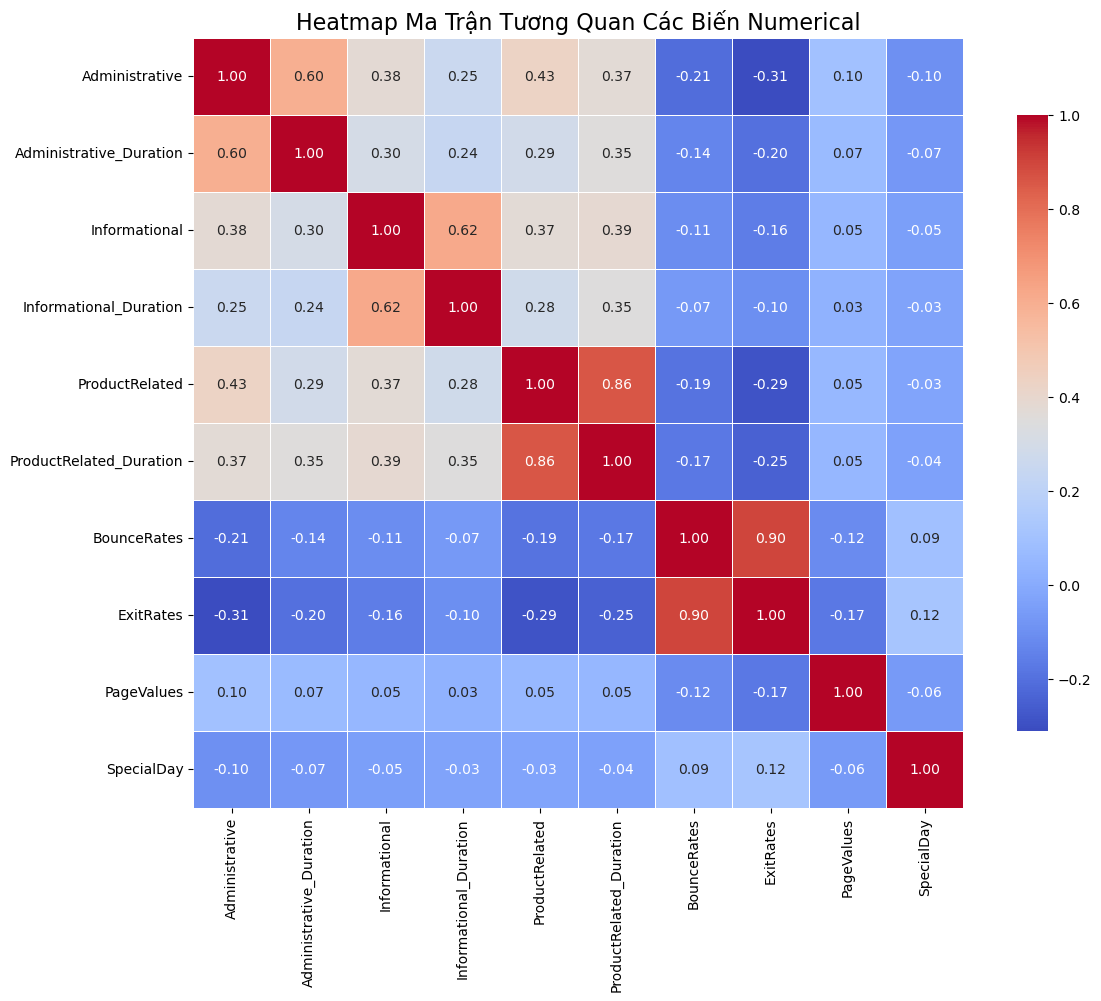

In [121]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,            # hiển thị giá trị tương quan
    fmt=".2f",             # format số
    linewidths=0.5,         # đường phân cách các ô
    cmap="coolwarm",        # bảng màu dễ đọc
    square=True,            # ô vuông
    cbar_kws={"shrink": 0.8}  # thu nhỏ colorbar
)

plt.title("Heatmap Ma Trận Tương Quan Các Biến Numerical", fontsize=16)
plt.show()

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét về các mối quan hệ tương quan mạnh quan sát được
  </h5>
</div>

- Các cặp biến tương quan mạnh:
    - `Administrative` và `Administrative_Duration`
    - `Informational` và `Informational_Duration`
    - `ProductRelated` và `ProductRelated_Duration`
    - `BounceRates` và `ExitRates`
- 3 cặp biến về số trang xem và thời gian xem của loại trang đó (`Administrative` và `Administrative_Duration`, `Informational` và `Informational_Duration`, `ProductRelated` và `ProductRelated_Duration`) có tương quan mạnh vì trong cùng một phiên truy cập, số trang được xem càng nhiều thì tổng thời gian dành cho loại trang đó càng tăng. Đặc biệt, `ProductRelated` và `ProductRelated_Duration`có mối tương quan rất mạnh với hệ số tương quan xấp xỉ 0.86
- Hai biến `BounceRates` và `ExitRates` thể hiện mối tương quan rất mạnh vì cả hai đều mô tả hành vi người dùng rời khỏi phiên truy cập, mặc dù mỗi biến đo lường theo một góc độ khác nhau. Một trang có tỷ lệ bounce cao thường cũng là trang mà tỉ lệ người dùng rời phiên cao, khiến cả hai chỉ số tăng đồng thời.

<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Categorical x Categorical
  </h4>
</div>


Ở phần này, các cặp biến categorical quan trọng được thể hiện tương quan bằng bảng tần số, trực quan hóa bằng heatmap.

Các cặp biến được chọn:

* **Tất cả các cột khác $\times$ `Revenue`**
    * Xác định tỷ lệ chuyển đổi (`Revenue`) giữa các giá trị khác nhau của các thuộc tính phân loại.

* **`VisitorType` $\times$ `TrafficType`**
    * Phân tích Tương tác Kênh & Phân khúc: Kênh traffic nào thu hút Khách hàng Mới hiệu quả nhất và kênh nào giữ chân Khách hàng Quay lại.

* **`Month` $\times$ `TrafficType`**
    * Phân tích Tương tác Kênh & Mùa vụ: Theo dõi sự thay đổi trong mức độ sử dụng/tần suất của các kênh traffic theo từng tháng trong năm.

* **`Month` $\times$ `VisitorType`**
    * Phân tích Thay đổi Khán giả theo Thời gian: Quan sát xem tỷ lệ Khách hàng Mới và Khách hàng Quay lại có biến động như thế nào giữa các tháng, giúp điều chỉnh mục tiêu tiếp thị theo mùa.


In [122]:
categorical_cols = [
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend', 'Revenue'
]

numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

In [123]:
print("="*80)
print("BẢNG PHÂN TÍCH TỶ LỆ CHUYỂN ĐỔI")
print("="*80)

for col in categorical_cols:
    print(f"\n{'='*20} PHÂN TÍCH BIẾN: {col.upper()} {'='*20}")
    
    # 1. Tính Tỷ lệ chuyển đổi (%) (Normalize theo dòng)
    rates = pd.crosstab(data[col], data['Revenue'], normalize='index') * 100
    rates.rename(columns={True: 'Conversion (%)', False: 'No Buy (%)'}, inplace=True)
    
    # 2. Tính Tổng số lượng thực tế (Total Count)
    counts = data[col].value_counts()
    counts.name = 'Total Count'
    
    # 3. Gộp lại
    result = pd.concat([counts, rates], axis=1)
    
    # 4. Sắp xếp & Chọn cột (ĐÃ LOẠI BỎ CỘT 'NO BUY')
    final_table = result[['Total Count', 'Conversion (%)']].sort_values(
        by='Total Count', 
        ascending=False
    )
    
    # 5. Hiển thị bảng
    print(final_table)
    print("\n")

BẢNG PHÂN TÍCH TỶ LỆ CHUYỂN ĐỔI

==================== PHÂN TÍCH BIẾN: MONTH ====================
       Total Count  Conversion (%)
Month                             
May           3329       10.964254
Nov           2982       25.486251
Mar           1860       10.322581
Dec           1706       12.661196
Oct            549       20.947177
Sep            448       19.196429
Aug            433       17.551963
Jul            432       15.277778
June           285       10.175439
Feb            181        1.657459
Jan              0             NaN
Apr              0             NaN



==================== PHÂN TÍCH BIẾN: OPERATINGSYSTEMS ====================
                  Total Count  Conversion (%)
OperatingSystems                             
2                        6541       17.657850
1                        2549       14.868576
3                        2530       10.592885
4                         478       17.782427
8                          75       22.666667
6            

In [124]:
def freq_table(df, col1, col2, plot_heatmap=False):
    table = pd.crosstab(df[col1], df[col2])
    if plot_heatmap:
        plt.figure(figsize=(12,6))
        sns.heatmap(table, annot=True, fmt='d', linewidths=.5)
        plt.title(f"Heatmap: {col1} {col2}")
        plt.show()
    return table


Frequency Table: VisitorType and Month


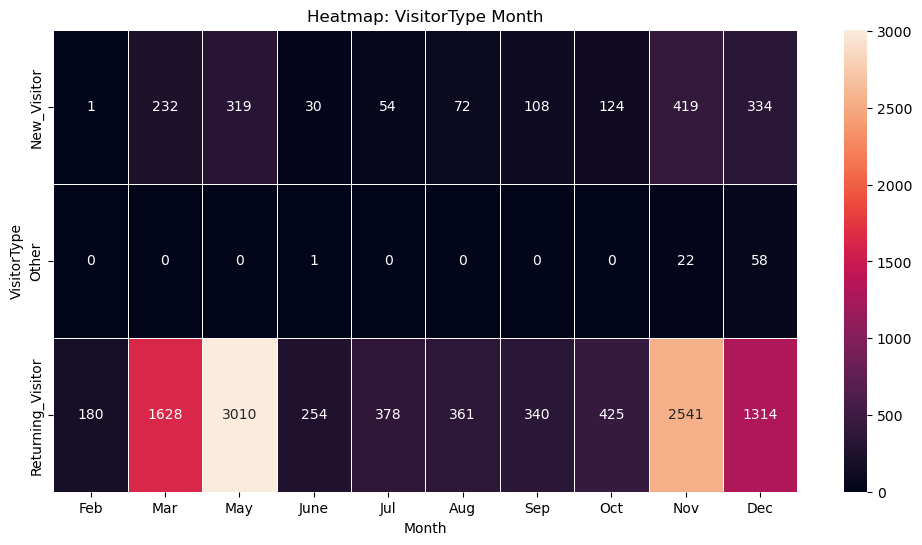


Frequency Table: VisitorType and TrafficType


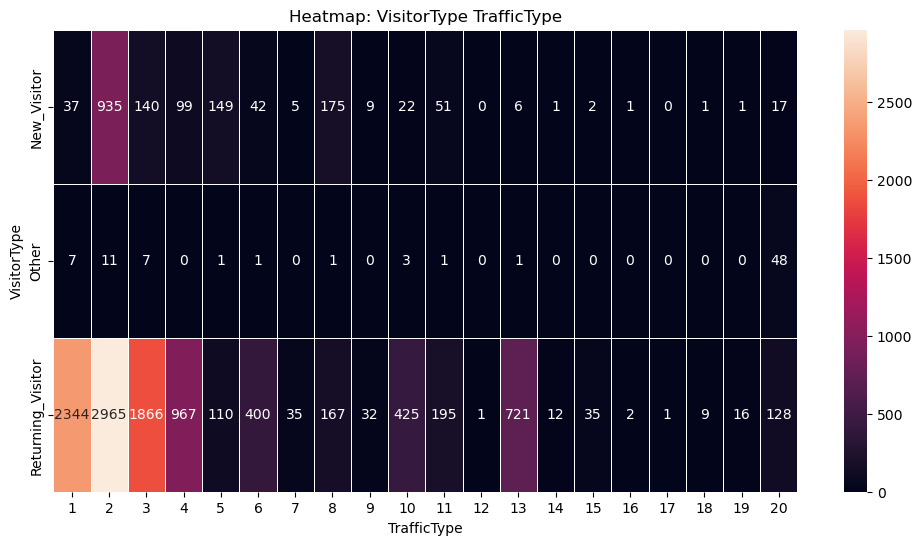

In [128]:
important_pairs = [
    ('VisitorType', 'Month'),
    ('VisitorType', 'TrafficType'),
]

# Tạo bảng tần suất + heatmap cho từng cặp
results = {}

for col1, col2 in important_pairs:
    print(f"\nFrequency Table: {col1} and {col2}")
    table = freq_table(data, col1, col2, plot_heatmap=True)
    results[f"{col1}_{col2}"] = table

<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

**Về tỉ lệ chuyển đổi:**
- **`VisitorType`**
  - `New_Visitor` có tỷ lệ chuyển đổi cao hơn `Returning_Visitor`.
  - `Returning_Visitor` chiếm phần lớn số lượng người dùng (10,431) nhưng tỷ lệ chuyển đổi chỉ đạt 14.09%.
  - `New_Visitor` có quy mô nhỏ hơn (1,693) nhưng đạt tỷ lệ chuyển đổi 24.93%.
  - Dữ liệu cho thấy sự khác biệt rõ rệt về hiệu suất chuyển đổi giữa hai nhóm, dù `Returning_Visitor` chiếm ưu thế về số lượng.

- **`Month`**
  - `Nov` là tháng có hiệu suất nổi bật nhất.
  - `Nov` vừa có lượng truy cập cao (2,982 – đứng thứ 2 trong năm) vừa có tỷ lệ chuyển đổi cao nhất (25.49%).
  - `May` ghi nhận lượng traffic cao nhất trong năm (3,329).
  - Tuy nhiên, tỷ lệ chuyển đổi của `May` chỉ đạt 10.96%, thấp hơn mức trung bình toàn bộ dữ liệu (~15%).
  - `Sep` và `Oct` có lượng traffic ở mức trung bình.
  - Hai tháng này ghi nhận tỷ lệ chuyển đổi tương đối cao (xấp xỉ 20%), cao hơn nhiều tháng khác.

- **`TrafficType`**
  - `TrafficType = 2` là nguồn truy cập có hiệu suất cao nhất.
  - Đây cũng là nguồn có lượng truy cập lớn nhất (3,911) với tỷ lệ chuyển đổi đạt 21.66%.
  - `TrafficType = 1` và `TrafficType = 3` mang lại lượng traffic lớn (tổng hơn 4,400 lượt).
  - Tuy nhiên, tỷ lệ chuyển đổi của hai nguồn này thấp hơn đáng kể (10.97% và 8.94%).
  - `TrafficType = 8` và `TrafficType = 20` có quy mô truy cập nhỏ hơn.
  - Dù vậy, hai nguồn này đạt tỷ lệ chuyển đổi cao (27.7% và 25.91%) trong phạm vi dữ liệu quan sát.

- **`Weekend`**
  - Tỷ lệ chuyển đổi vào `Weekend = True` đạt 17.45%.
  - Tỷ lệ chuyển đổi vào `Weekend = False` thấp hơn, ở mức 15.08%.
  - Lưu lượng truy cập vào ngày thường vẫn cao hơn so với cuối tuần.

- **`Region`**
  - Tỷ lệ chuyển đổi giữa các `Region` không có sự chênh lệch đáng kể.
  - Các giá trị chủ yếu dao động trong khoảng 14%–17%.

- **`Browser`**
  - `Browser = 2` là trình duyệt được sử dụng nhiều nhất.
  - Tỷ lệ chuyển đổi của `Browser = 2` ở mức ổn định (15.51%).
  - `Browser = 3` có hơn 100 người dùng nhưng tỷ lệ chuyển đổi thấp (4.76%).
  - `Browser = 12` và `Browser = 13` có tỷ lệ chuyển đổi cao (khoảng 30%).
  - Tuy nhiên, số lượng quan sát của hai trình duyệt này nhỏ nên mức độ đại diện không cao.

**Về mối quan hệ giữa các biến khác:**
- **`VisitorType × Month`**
  - `Returning_Visitor`:
    - Phân phối truy cập theo tháng tương tự phân phối tổng thể.
    - Lượng truy cập tập trung cao ở các tháng cao điểm như `May` và `Nov`.
  - `New_Visitor`:
    - Thể hiện xu hướng phân phối khác biệt so với tổng thể.
    - Lượng `New_Visitor` tăng rõ rệt vào các tháng cuối năm, đặc biệt là `Nov` và `Dec`.
    - Phân phối này cho thấy sự gia tăng tỷ trọng khách hàng mới trong giai đoạn cuối năm.

- **`VisitorType × TrafficType`**
  - `Returning_Visitor`:
    - Tập trung chủ yếu ở các kênh phổ biến (`TrafficType = 1, 2, 3, 4`).
    - Có sự hiện diện đáng kể ở một số kênh khác như `TrafficType = 6, 10, 13`.
  - `New_Visitor`:
    - Hầu như không xuất hiện ở `TrafficType = 1`.
    - Tập trung mạnh vào `TrafficType = 2`.
    - `TrafficType = 5` và `TrafficType = 8` có số lượng `New_Visitor` cao hơn `Returning_Visitor`.
    - Hai kênh này được xác định là các nguồn có hiệu quả cao trong việc thu hút khách hàng mới.




<div style="
  margin: 18px 0 12px 0;
  padding: 6px 14px;
  border: 1px solid #dbeafe;
  border-radius: 8px;
  background-color: #f8fbff;
  display: inline-block;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Numerical x Categorical
  </h4>
</div>


Việc so sánh thống kê (Trung bình, Trung vị) của các chỉ số định lượng theo các nhóm phân loại giúp định lượng hóa sự khác biệt về hành vi:

* **Phân tích Hành vi với Biến Mục tiêu (`Revenue`):**
    * (`Revenue` $\times$ `PageValues`, `ExitRates`, `ProductRelated_Duration`, `BounceRates`, `SpecialDay`): Các cặp này nhằm mục đích định lượng sự khác biệt về hành vi giữa nhóm có mua hàng và không mua hàng. Mục đích là tìm ra các ngưỡng giá trị hoặc hành vi đặc trưng có ý nghĩa thống kê, giúp phân biệt rõ ràng hai lớp mục tiêu.

* **Phân tích Hành vi giữa các Biến Độc lập:**
    * (`VisitorType` $\times$ `Duration`, `Rates`), (`TrafficType` $\times$ `Duration`, `Rates`): Các cặp này giúp đánh giá chất lượng và mức độ tương tác của từng nhóm hoặc kênh. Mục đích là xác định xem các nhóm khách hàng và các kênh traffic khác nhau có dẫn đến các kiểu hành vi duyệt web khác nhau (ví dụ: tỷ lệ bỏ qua cao hơn, thời gian xem ít hơn) hay không, từ đó đánh giá chất lượng của từng phân khúc.

In [126]:
def grouped_stats(df, cat_col, num_col):
    """
    Tạo bảng thống kê nhóm cho numerical × categorical
    Gồm mean, median, std, min, max
    """
    table = df.groupby(cat_col, observed=False)[num_col].agg(
        ['mean', 'median', 'std', 'min', 'max']
    )
    return table


In [127]:
# Danh sách categorical quan trọng
important_cats = [
    # 'VisitorType', 
    # 'TrafficType', 
    'Revenue'
]

# Map: mỗi categorical nên kết hợp với numerical nào
cat_num_map = {
    # 'VisitorType': ['ProductRelated_Duration', 'BounceRates'],
    # 'TrafficType': ['BounceRates', 'ProductRelated_Duration'],
    'Revenue': ['Administrative_Duration', 'Informational_Duration', 'PageValues', 'ProductRelated_Duration', 'BounceRates', 'SpecialDay']
}

# Nếu categorical không có trong map thì dùng toàn bộ numeric
default_nums = [
    'ProductRelated', 'ProductRelated_Duration',
    'Administrative_Duration', 'Informational_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

# Loop tạo toàn bộ bảng thống kê numerical × categorical
for cat in important_cats:
    nums = cat_num_map.get(cat, default_nums)

    for num in nums:
        print("-" * 80)
        print(f"Grouped Statistics for: {num}  BY  {cat}")
        
        table = grouped_stats(data, cat, num)
        display(table)


--------------------------------------------------------------------------------
Grouped Statistics for: Administrative_Duration  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
New_Visitor,636.77,415.50,766.41,0.0,12983.79
Other,598.57,166.00,1288.76,0.0,9630.21
Returning_Visitor,1304.26,671.64,2034.32,0.0,63973.52


--------------------------------------------------------------------------------
Grouped Statistics for: Informational_Duration  BY  Revenue


,mean,median,std,min,max
VisitorType,,,,,
New_Visitor,5.15e-03,0.00e+00,0.03,0.0,0.2
Other,3.06e-02,0.00e+00,0.07,0.0,0.2
Returning_Visitor,2.28e-02,5.05e-03,0.05,0.0,0.2


--------------------------------------------------------------------------------
Grouped Statistics for: BounceRates  BY  TrafficType


,mean,median,std,min,max
TrafficType,,,,,
1,2.79e-02,7.69e-03,5.26e-02,0.00,0.20
2,8.36e-03,0.00e+00,2.64e-02,0.00,0.20
3,3.01e-02,6.67e-03,5.43e-02,0.00,0.20
4,1.57e-02,1.39e-03,3.74e-02,0.00,0.20
5,9.45e-03,0.00e+00,3.27e-02,0.00,0.20
6,2.17e-02,3.64e-03,4.64e-02,0.00,0.20
7,7.82e-03,1.49e-03,1.24e-02,0.00,0.05
8,1.15e-02,0.00e+00,3.64e-02,0.00,0.20
9,2.21e-02,0.00e+00,5.97e-02,0.00,0.20


--------------------------------------------------------------------------------
Grouped Statistics for: ProductRelated_Duration  BY  TrafficType


,mean,median,std,min,max
TrafficType,,,,,
1,1266.59,633.98,1827.45,0.00,23342.08
2,1458.69,777.05,2264.05,0.00,63973.52
3,910.05,422.13,1489.97,0.00,23050.10
4,991.73,606.83,1244.06,0.00,13158.67
5,742.33,322.73,1623.54,0.00,16093.31
6,1142.99,598.25,1435.37,0.00,11308.10
7,1035.01,830.42,940.01,11.00,3648.56
8,1084.49,504.60,1973.10,0.00,24844.16
9,555.01,314.90,738.22,0.00,3726.33


--------------------------------------------------------------------------------
Grouped Statistics for: PageValues  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
False,2.00,0.00,9.12,0.0,246.76
True,27.26,16.76,35.19,0.0,361.76


--------------------------------------------------------------------------------
Grouped Statistics for: PageValues  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
False,0.05,0.03,0.05,0.0,246.758590
True,0.02,0.02,0.02,0.0,361.763742


--------------------------------------------------------------------------------
Grouped Statistics for: ProductRelated_Duration  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
False,1082.976881,526.00000,1810.834046,0.0,63973.52223
True,1876.209615,1109.90625,2312.214392,0.0,27009.85943


--------------------------------------------------------------------------------
Grouped Statistics for: BounceRates  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
False,0.023197,0.003922,0.048466,0.0,0.2
True,0.005117,0.000000,0.012185,0.0,0.2


--------------------------------------------------------------------------------
Grouped Statistics for: SpecialDay  BY  Revenue


,mean,median,std,min,max
Revenue,,,,,
False,0.069127,0.0,0.209996,0.0,1.0
True,0.023166,0.0,0.123521,0.0,1.0


<div style="margin: 14px 0 8px 0;">
  <h5 style="margin: 0; font-weight: 500;">
    ▸ Nhận xét
  </h5>
</div>

Dữ liệu cho thấy sự khác biệt rõ rệt về hành vi giữa hai nhóm Mua (`Revenue`=True) và Không mua (`Revenue`=False) thông qua các nhóm chỉ số chính.

- **`PageValues` và `ProductRelated_Duration`**

    - Phân phối của `PageValues` thể hiện sự phân hóa rất mạnh giữa hai nhóm. Phần lớn các phiên thuộc nhóm `Revenue`=False có giá trị `PageValues` bằng 0, trong khi nhóm `Revenue`=True có các giá trị cao hơn đáng kể.

    - Điều này cho thấy `PageValues` là biến phân biệt rõ ràng giữa hai nhóm, trong đó việc `PageValues` lớn hơn 0 thường chỉ xuất hiện ở các phiên có phát sinh mua hàng.
    - Bên cạnh đó, `ProductRelated_Duration` của nhóm `Revenue`=True cao hơn, phản ánh thời gian tương tác với các trang sản phẩm lớn hơn so với nhóm không mua.

- **Độ biến động của các biến thời gian**

    - Các biến thời gian (`Duration`) ở nhóm `Revenue`=True có độ lệch chuẩn lớn hơn đáng kể so với nhóm `Revenue`=False.

    - Điều này cho thấy hành vi của người mua phân tán hơn, với thời gian tương tác rất khác nhau giữa các phiên. Ngược lại, nhóm không mua có dữ liệu tập trung hơn, nhiều phiên có thời gian tương tác thấp hoặc bằng 0.

- **`ExitRates` và `BounceRates`**

    - Hai chỉ số `ExitRates` và `BounceRates` ở nhóm `Revenue`=True thấp hơn rõ rệt so với nhóm `Revenue`=False.

    - Sự khác biệt này cho thấy các phiên có mua hàng thường gắn liền với mức độ rời trang thấp hơn và ít phiên chỉ xem một trang duy nhất, trong khi nhóm không mua có xu hướng rời trang sớm hơn.

- **`SpecialDay`**

    - Giá trị trung bình của `SpecialDay` ở nhóm `Revenue`=False cao hơn so với nhóm `Revenue`=True.

    - Điều này phản ánh rằng trong các phiên không mua, chỉ số `SpecialDay` xuất hiện với tần suất hoặc mức độ cao hơn so với các phiên có mua hàng.

- **Hành vi tại các trang chức năng**

    - `Administrative_Duration` có sự khác biệt rõ rệt về trung vị. Nhóm `Revenue`=False có trung vị bằng 0, trong khi nhóm `Revenue`=True có thời gian dành cho nhóm trang này cao hơn.

    - `Informational_Duration` không thể hiện sự khác biệt đáng kể giữa hai nhóm, khi trung vị của cả `Revenue`=True và `Revenue`=False đều bằng 0.

### VII. Nhận xét
#### Tổng quan
- 3–5 điểm quan trọng từ quá trình khám phá dữ liệu  
- Các vấn đề chất lượng dữ liệu được phát hiện  
- Các bước tiền xử lý cần thực hiện  
- Các pattern thú vị có thể dẫn đến câu hỏi nghiên cứu

#### Các vấn đề nghiêm trọng
- Liệt kê các vấn đề chất lượng dữ liệu nghiêm trọng  
- Ghi chú các hạn chế có thể ảnh hưởng đến phân tích